# Análisis de estadísticas de jugadores de las 5 grandes ligas (2023-2024)

En este notebook realizamos la limpieza, transformación y visualización de un dataset con estadísticas de jugadores de fútbol de las 5 grandes ligas europeas durante la temporada 2023-2024.

In [5]:
!pip install pandas

## 1. Carga de datos

In [6]:
import pandas as pd

# Cargar dataset
df = pd.read_csv('../data/big_5_players_stats_2023_2024.csv')
df.head()

Rank             Player   Nation Position           Squad  \
0    1         Max Aarons  eng ENG       DF     Bournemouth   
1    2   Brenden Aaronson   us USA    MF,FW    Union Berlin   
2    3    Paxten Aaronson   us USA       MF  Eint Frankfurt   
3    4  Keyliane Abdallah   fr FRA       FW       Marseille   
4    5   Yunis Abdelhamid   ma MAR       DF           Reims   

          Competition Age Year_Born Playing Time_MP Playing Time_Starts  ...  \
0  eng Premier League  23      2000              20                  13  ...   
1       de Bundesliga  22      2000              30                  14  ...   
2       de Bundesliga  19      2003               7                   1  ...   
3          fr Ligue 1  17      2006               1                   0  ...   
4          fr Ligue 1  35      1987              31                  31  ...   

  Per 90 Minutes_Gls Per 90 Minutes_Ast Per 90 Minutes_G+A  \
0               0.00               0.07               0.07   
1               0.14               0.14               0.28   
2               0.00               0.89               0.89   
3               0.00               0.00               0.00   
4               0.13               0.00               0.13   

  Per 90 Minutes_G-PK Per 90 Minutes_G+A-PK Per 90 Minutes_xG  \
0                0.00                  0.07              0.00   
1                0.14                  0.28              0.14   
2                0.00                  0.89              0.11   
3                0.00                  0.00              0.00   
4                0.10                  0.10              0.11   

  Per 90 Minutes_xAG Per 90 Minutes_xG+xAG Per 90 Minutes_npxG  \
0               0.06                  0.06                0.00   
1               0.13                  0.27                0.14   
2               0.07                  0.19                0.11   
3               0.00                  0.00                0.00   
4               0.01                  0.12                0.09   

  Per 90 Minutes_npxG+xAG  
0                    0.06  
1                    0.27  
2                    0.19  
3                    0.00  
4                    0.09  

[5 rows x 37 columns]

## 2. Limpieza de datos

### 2.1 Conversión de columnas numéricas a enteros

In [7]:
int_cols = ['Rank', 'Age', 'Year_Born', 'Playing Time_MP', 'Playing Time_Starts',
            'Playing Time_Min', 'Performance_Gls', 'Performance_Ast', 'Performance_G+A',
            'Performance_G-PK', 'Performance_PK', 'Performance_PKatt',
            'Performance_CrdY', 'Performance_CrdR', 'Progression_PrgC']

df[int_cols] = df[int_cols].astype('str')

# Convertir columnas a Int64 y detectar valores problemáticos
for col in int_cols:
    try:
        df[col] = df[col].astype('Int64')
    except:
        print(f'Filas problemáticas en columna {col}:')
        bad_rows = df[df[col].str.isnumeric() == False]
        print(bad_rows)

Filas problemáticas en columna Rank:
     Rank  Player  Nation Position  Squad Competition  Age Year_Born  \
25     Rk  Player  Nation      Pos  Squad        Comp  Age      Born   
51     Rk  Player  Nation      Pos  Squad        Comp  Age      Born   
77     Rk  Player  Nation      Pos  Squad        Comp  Age      Born   
103    Rk  Player  Nation      Pos  Squad        Comp  Age      Born   
129    Rk  Player  Nation      Pos  Squad        Comp  Age      Born   
...   ...     ...     ...      ...    ...         ...  ...       ...   
2851   Rk  Player  Nation      Pos  Squad        Comp  Age      Born   
2877   Rk  Player  Nation      Pos  Squad        Comp  Age      Born   
2903   Rk  Player  Nation      Pos  Squad        Comp  Age      Born   
2929   Rk  Player  Nation      Pos  Squad        Comp  Age      Born   
2955   Rk  Player  Nation      Pos  Squad        Comp  Age      Born   

     Playing Time_MP Playing Time_Starts  ... Per 90 Minutes_Gls  \
25                MP          

### 2.2 Eliminación de duplicados

In [8]:
# Verificar duplicados
df.duplicated().sum()

# Eliminar duplicados manteniendo ninguno
df = df.drop_duplicates(keep=False).reset_index(drop=True)
df.duplicated().sum()

np.int64(0)

### 2.3 Conversión final de tipos de datos

In [9]:
# Reconvertir enteros
df[int_cols] = df[int_cols].astype('str')
for e in int_cols:
    df[e] = pd.to_numeric(df[e], errors='coerce').astype('Int64')

# Columnas tipo float
float_cols = ['Playing Time_90s', 'Expected_xG', 'Expected_npxG', 'Expected_xAG',
              'Expected_npxG+xAG','Per 90 Minutes_Gls', 'Per 90 Minutes_Ast',
              'Per 90 Minutes_G+A','Per 90 Minutes_G-PK','Per 90 Minutes_G+A-PK',
              'Per 90 Minutes_xG','Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG',
              'Per 90 Minutes_npxG', 'Per 90 Minutes_npxG+xAG']

df[float_cols] = df[float_cols].astype('str')
for e in float_cols:
    df[e] = pd.to_numeric(df[e], errors='coerce').astype('float')

# Columnas tipo string
str_cols = ['Player', 'Nation', 'Position', 'Squad', 'Competition']
df[str_cols] = df[str_cols].astype('string')

df.dtypes

Rank                                Int64
Player                     string[python]
Nation                     string[python]
Position                   string[python]
Squad                      string[python]
Competition                string[python]
Age                                 Int64
Year_Born                           Int64
Playing Time_MP                     Int64
Playing Time_Starts                 Int64
Playing Time_Min                    Int64
Playing Time_90s                  float64
Performance_Gls                     Int64
Performance_Ast                     Int64
Performance_G+A                     Int64
Performance_G-PK                    Int64
Performance_PK                      Int64
Performance_PKatt                   Int64
Performance_CrdY                    Int64
Performance_CrdR                    Int64
Expected_xG                       float64
Expected_npxG                     float64
Expected_xAG                      float64
Expected_npxG+xAG                 

## 3. Análisis exploratorio de datos

### 3.1 Conteo de jugadores por liga

In [10]:
df_conteo_ligas = df.groupby('Competition').agg('count')['Age'].rename('conteo_ligas')
df_conteo_ligas = df_conteo_ligas.sort_values(ascending=False)
df_conteo_ligas

Competition
it Serie A            613
es La Liga            606
eng Premier League    580
fr Ligue 1            540
de Bundesliga         505
Name: conteo_ligas, dtype: Int64

# Visualizaciones


## Distribucion de las edades en las distintas ligas de futbol europeo

### Grafico de barras simple


 Frecuencia absoluta


In [11]:
!pip install matplotlib

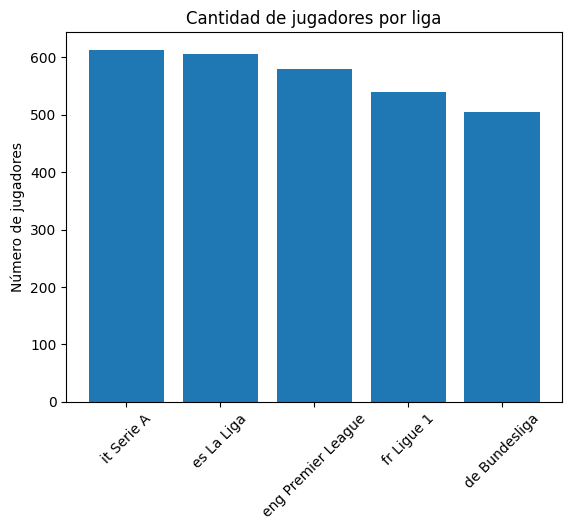

In [12]:
import matplotlib.pyplot as plt

plt.bar(df_conteo_ligas.index, df_conteo_ligas.values)
plt.xticks(rotation=45)
plt.ylabel('Número de jugadores')
plt.title('Cantidad de jugadores por liga')
plt.show()

Frecuencia relativa


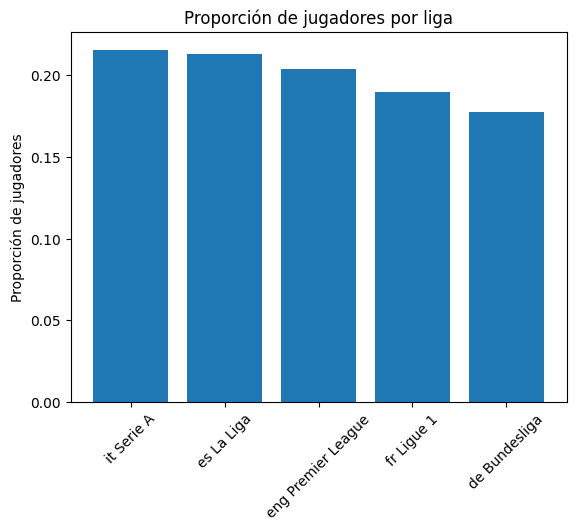

In [13]:

# Frecuencia relativa
df_conteo_ligas_rel = df_conteo_ligas / df_conteo_ligas.sum()

plt.bar(df_conteo_ligas_rel.index, df_conteo_ligas_rel.values)
plt.xticks(rotation=45)
plt.ylabel('Proporción de jugadores')
plt.title('Proporción de jugadores por liga')
plt.show()


### 3.2 Grafico de barras

Frecuencia absoluta


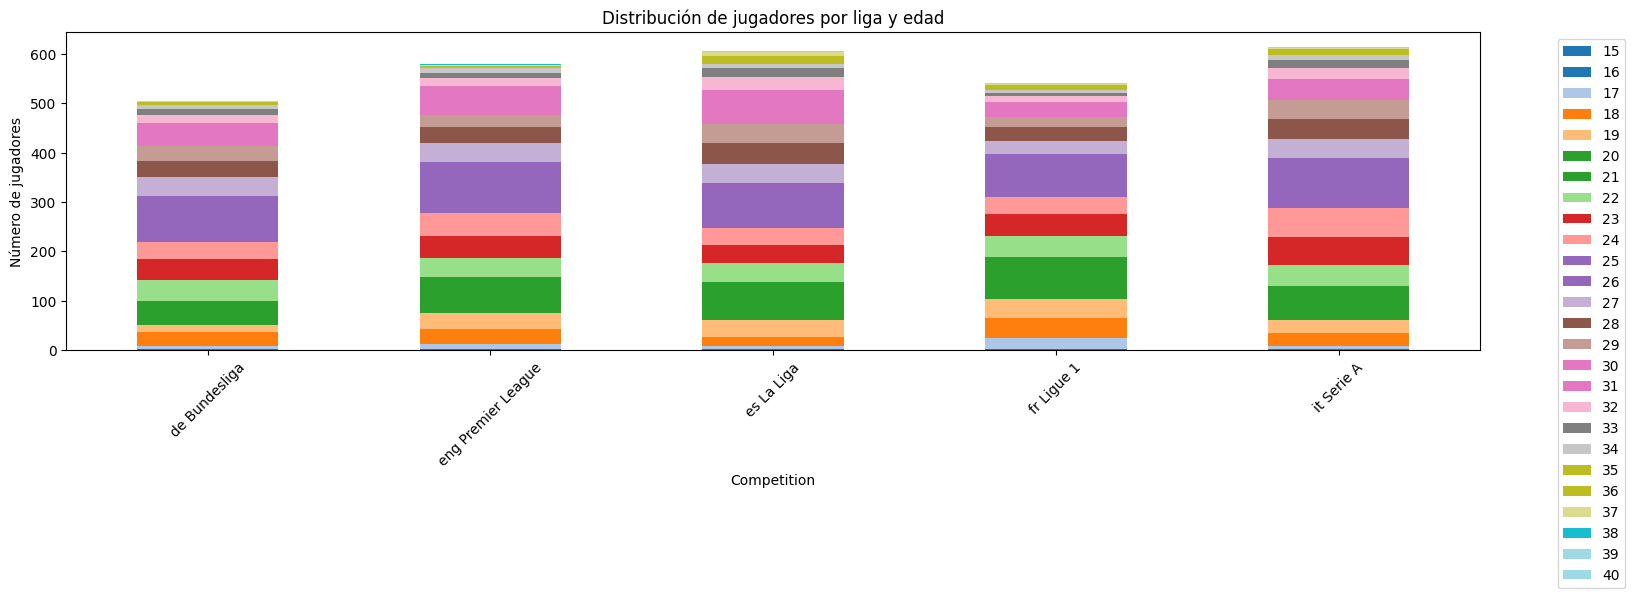

In [14]:
# Agrupar por liga y edad
df_grouped = df.groupby(['Competition','Age']).size().reset_index(name='Cantidad_Jugadores')
df_pivot = df_grouped.pivot(index='Competition', columns='Age', values='Cantidad_Jugadores').fillna(0)
df_pivot.plot(kind='bar', stacked=True, figsize=(15,6), colormap='tab20')
plt.ylabel('Número de jugadores')
plt.title('Distribución de jugadores por liga y edad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

 Frecuencia relativa


In [15]:
df_pivot_rel = df_pivot.div(df_pivot.sum(axis=1), axis=0)

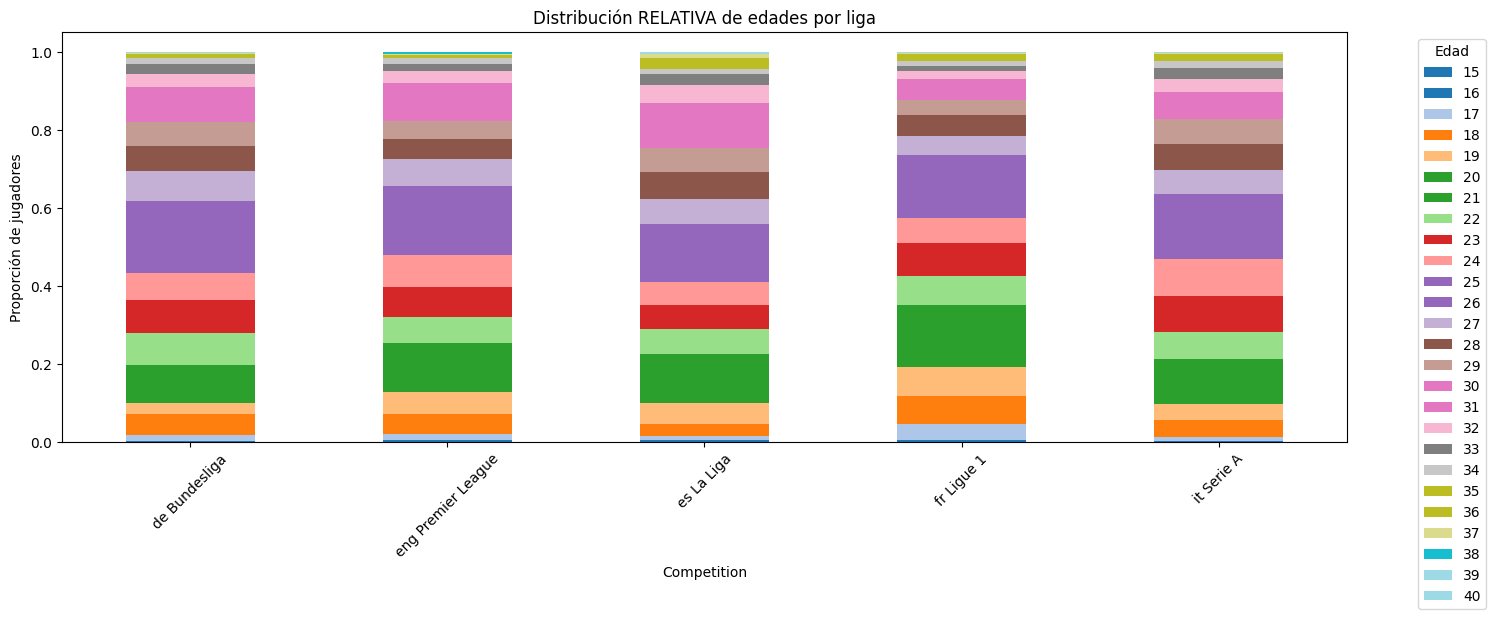

In [16]:
ax = df_pivot_rel.plot(kind='bar', stacked=True, figsize=(15,6), colormap='tab20')
plt.ylabel("Proporción de jugadores")
plt.title("Distribución RELATIVA de edades por liga")
plt.xticks(rotation=45)
plt.legend(title='Edad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 3.3 Histogramas, Boxplots y Violin Plots

Frecuencia absoluta


In [17]:
!pip install seaborn 


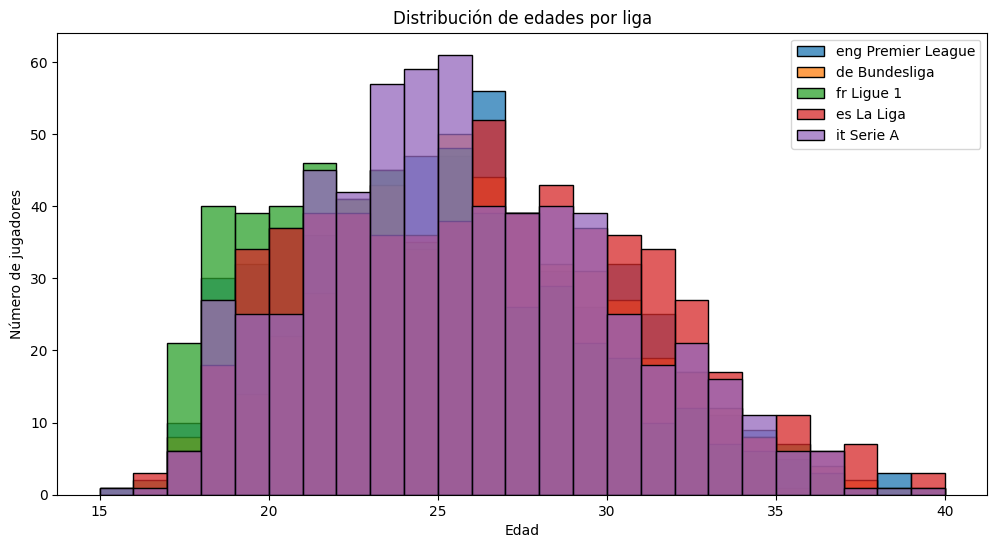

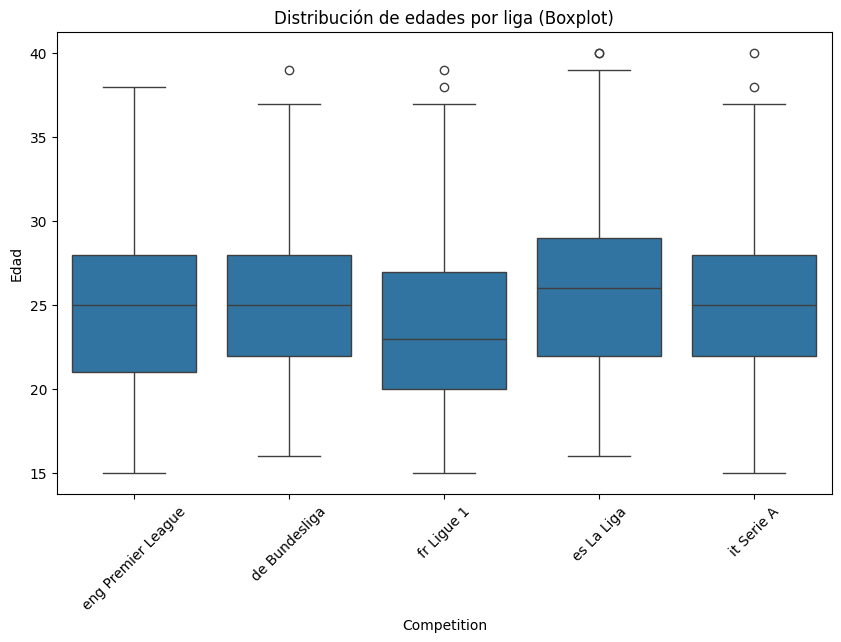

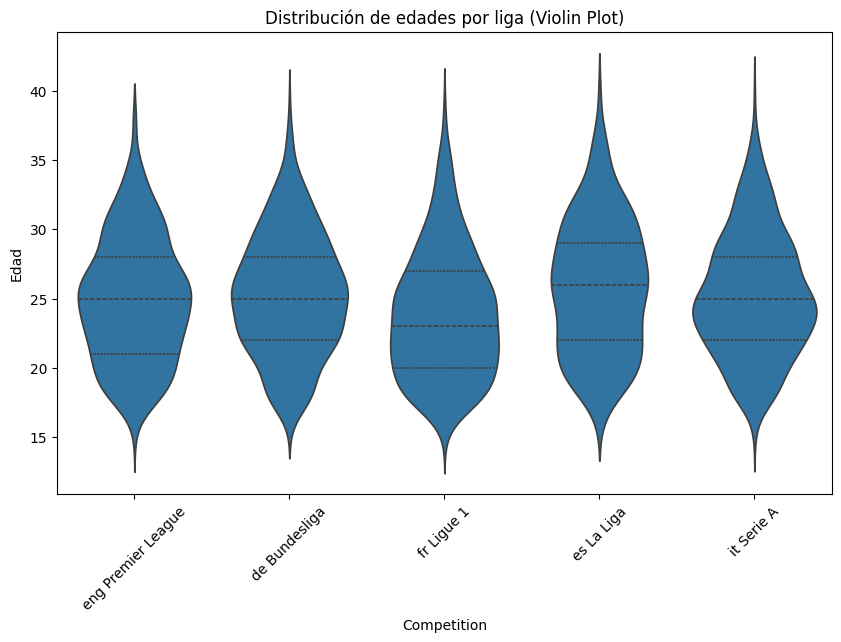

In [18]:
import seaborn as sns

# Histograma por liga

# No muy conveniente
plt.figure(figsize=(12,6))
for league in df['Competition'].unique():
    sns.histplot(df[df['Competition']==league]['Age'], label=league, kde=False, bins=range(15, 41))
plt.legend()
plt.xlabel('Edad')
plt.ylabel('Número de jugadores')
plt.title('Distribución de edades por liga')
plt.show()

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Competition', y='Age', data=df)
plt.xticks(rotation=45)
plt.ylabel('Edad')
plt.title('Distribución de edades por liga (Boxplot)')
plt.show()

# Violin Plot
plt.figure(figsize=(10,6))
sns.violinplot(x='Competition', y='Age', data=df, inner='quartile')
plt.xticks(rotation=45)
plt.ylabel('Edad')
plt.title('Distribución de edades por liga (Violin Plot)')
plt.show()

Frecuencia relativa


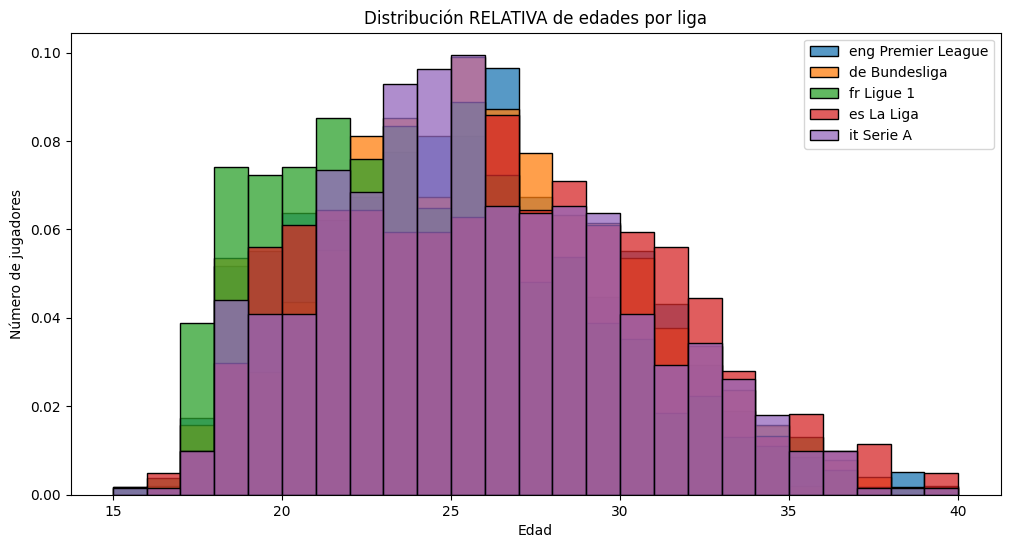

In [19]:
import seaborn as sns

# Histograma por liga
plt.figure(figsize=(12,6))
for league in df['Competition'].unique():
    sns.histplot(df[df['Competition']==league]['Age'], label=league, kde=False, bins=range(15, 41), stat='probability')
plt.legend()
plt.xlabel('Edad')
plt.ylabel('Número de jugadores')
plt.title('Distribución RELATIVA de edades por liga')
plt.show()

# Boxplot
# No se puede hacer relativo
    # plt.figure(figsize=(10,6))
    # sns.boxplot(x='Competition', y='Age', data=df)
    # plt.xticks(rotation=45)
    # plt.ylabel('Edad')
    # plt.title('Distribución de edades por liga (Boxplot)')
    # plt.show()

# Violin Plot
# No se puede hacer relativo
    # plt.figure(figsize=(10,6))
    # sns.violinplot(x='Competition', y='Age', data=df, inner='quartile')
    # plt.xticks(rotation=45)
    # plt.ylabel('Edad')
    # plt.title('Distribución de edades por liga (Violin Plot)')
    # plt.show()

### 3.4 Heatmap de edades por liga

Frecuencia absoluta


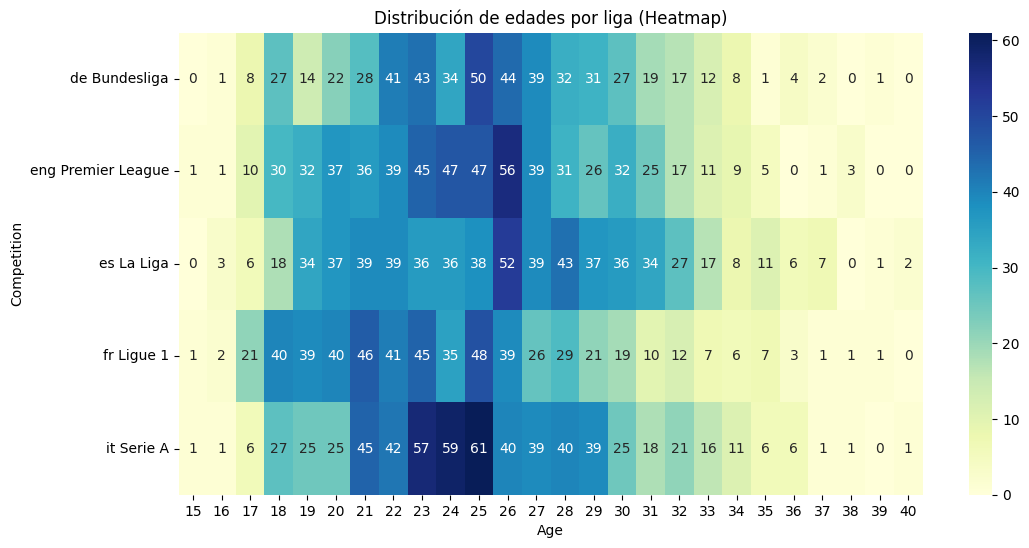

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(df_pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Distribución de edades por liga (Heatmap)')
plt.show()

Frecuencia relativa


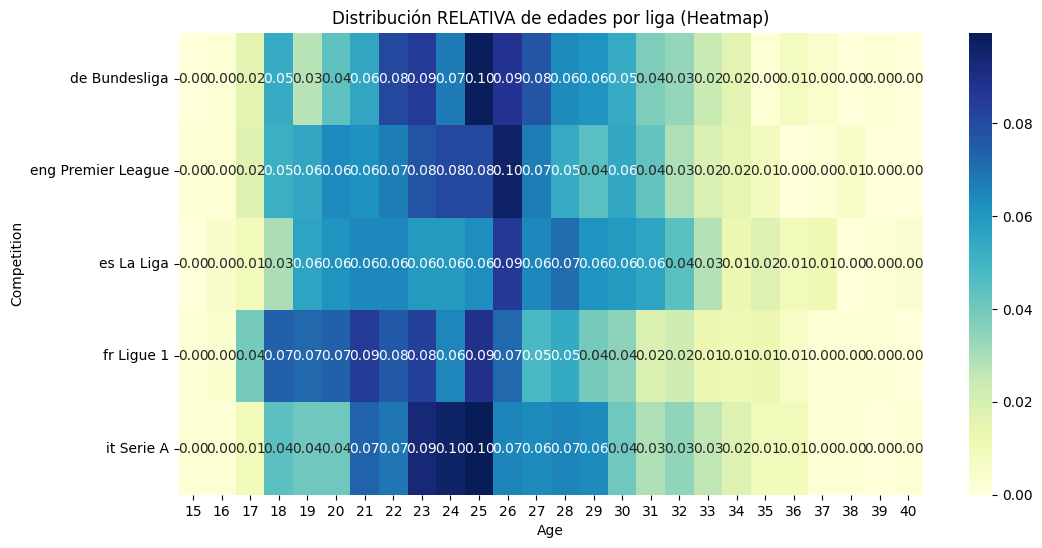

In [21]:
df_pivot_rel = df_pivot.div(df_pivot.sum(axis=1), axis=0)

plt.figure(figsize=(12,6))
sns.heatmap(df_pivot_rel, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Distribución RELATIVA de edades por liga (Heatmap)")
plt.show()

### Conclusíon

Hemos hecho distintos graficos en funcion a la edad de los jugadores, de los cuales podemos sacar diversas conclusiones.

- Los jugadores, en su gran mayoria se encuentran en edad entre los 23-26 años
- Vemos de forma excepcional que algun jugador tiene 15 años y 40 años como caso aislado (boxplot)
- Observamos que la liga inglesa es donde hay jugadores mas mayores

## Observaciones enfocadas en el Real Madrid

### Goles por jugador

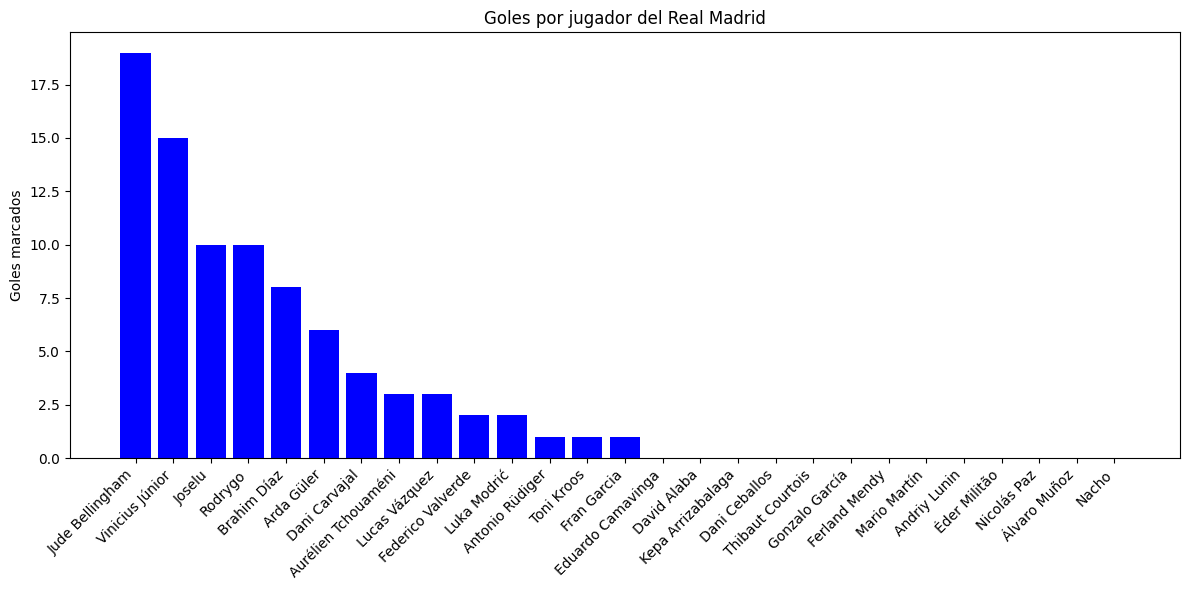

In [22]:
# Filtrar solo jugadores del Real Madrid
df_rm = df[df['Squad'] == 'Real Madrid']

# Ordenar por goles
df_rm = df_rm.sort_values('Performance_Gls', ascending=False)

# Gráfico de barras
plt.figure(figsize=(12,6))
plt.bar(df_rm['Player'], df_rm['Performance_Gls'], color='blue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Goles marcados')
plt.title('Goles por jugador del Real Madrid')
plt.tight_layout()
plt.show()


### Eficiencia goleadora por jugador del Real Madrid

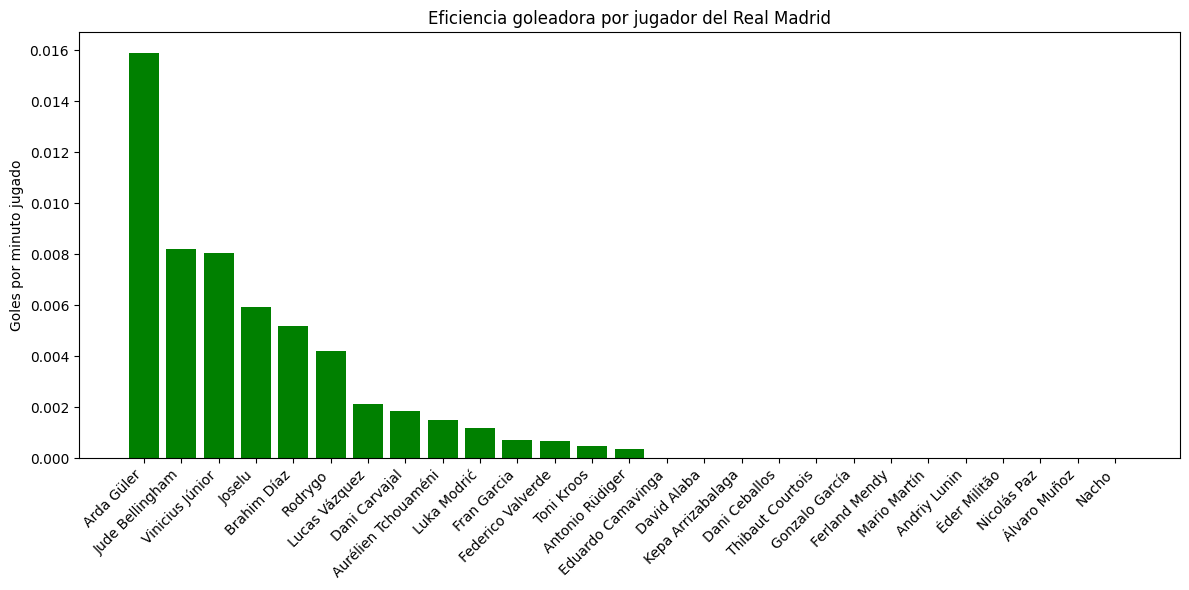

In [23]:
# Filtrar solo jugadores del Real Madrid
df_rm = df[df['Squad'] == 'Real Madrid'].copy()

# Calcular goles por minuto
df_rm['Goles_por_min'] = df_rm['Performance_Gls'] / df_rm['Playing Time_Min']

# Ordenar por eficiencia goleadora
df_rm = df_rm.sort_values('Goles_por_min', ascending=False)

# Gráfico de barras
plt.figure(figsize=(12,6))
plt.bar(df_rm['Player'], df_rm['Goles_por_min'], color='green')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Goles por minuto jugado')
plt.title('Eficiencia goleadora por jugador del Real Madrid')
plt.tight_layout()
plt.show()

### Goles esperados por jugador del Real Madrid

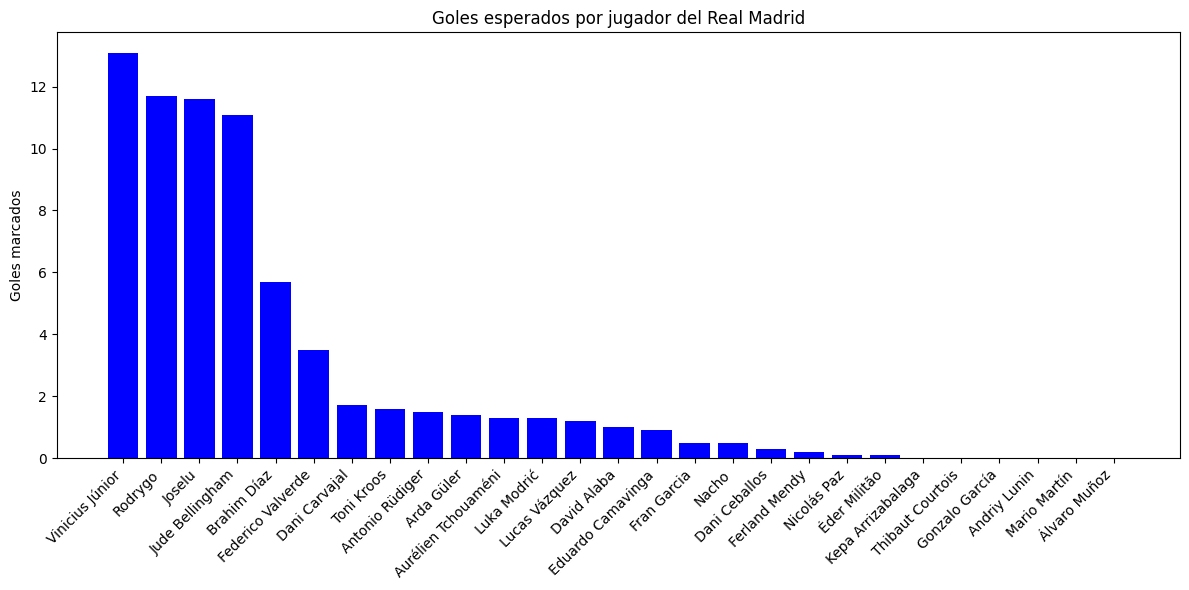

In [24]:
# Filtrar solo jugadores del Real Madrid
df_rm = df[df['Squad'] == 'Real Madrid']

# Ordenar por goles
df_rm = df_rm.sort_values('Expected_xG', ascending=False)

# Gráfico de barras
plt.figure(figsize=(12,6))
plt.bar(df_rm['Player'], df_rm['Expected_xG'], color='blue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Goles marcados')
plt.title('Goles esperados por jugador del Real Madrid')
plt.tight_layout()
plt.show()

### Eficiencia goleadora esperada por jugador del Real Madrid

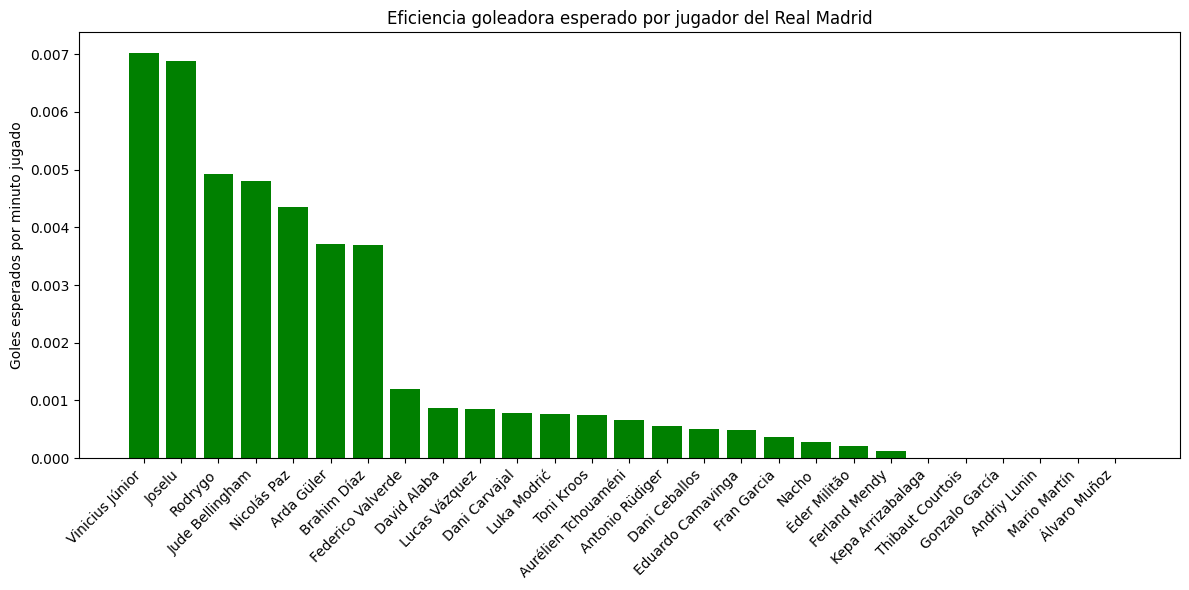

In [25]:
# Filtrar solo jugadores del Real Madrid
df_rm = df[df['Squad'] == 'Real Madrid'].copy()

# Calcular goles por minuto
df_rm['GolesEsperados_por_min'] = df_rm['Expected_xG'] / df_rm['Playing Time_Min']

# Ordenar por eficiencia goleadora
df_rm = df_rm.sort_values('GolesEsperados_por_min', ascending=False)

# Gráfico de barras
plt.figure(figsize=(12,6))
plt.bar(df_rm['Player'], df_rm['GolesEsperados_por_min'], color='green')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Goles esperados por minuto jugado')
plt.title('Eficiencia goleadora esperado por jugador del Real Madrid')
plt.tight_layout()
plt.show()

### Coparación entre goles por minuto esperados y goles por minuto realizados de los jugadores 

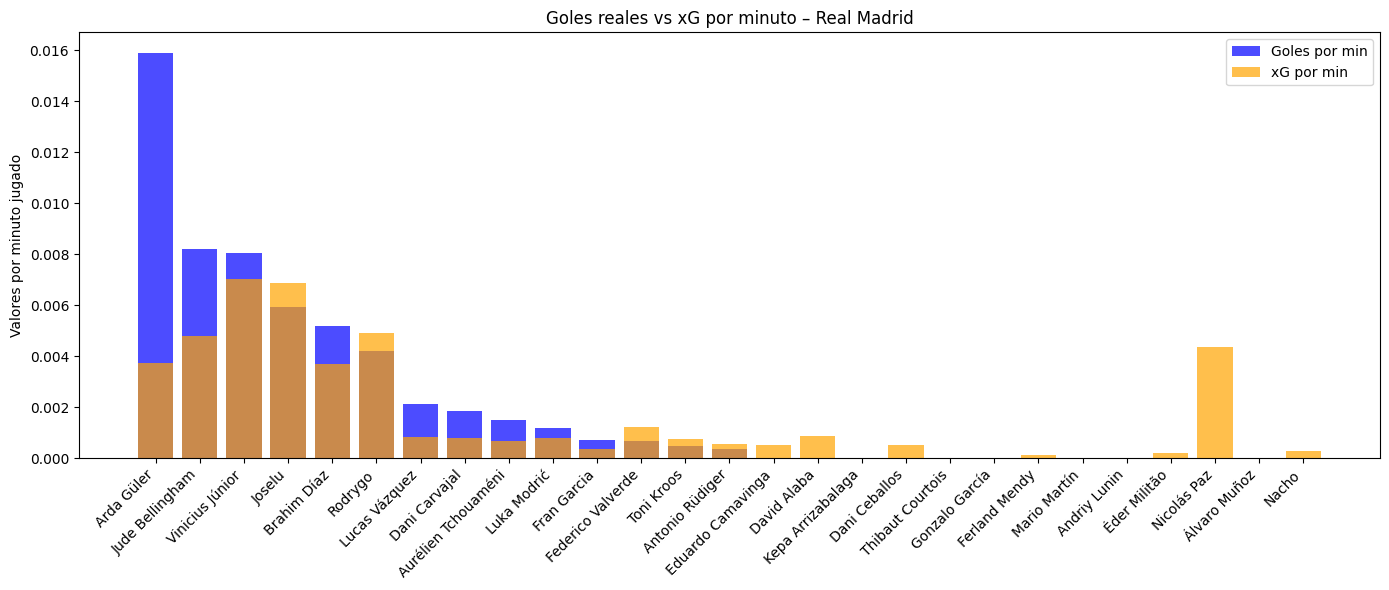

In [26]:

# Filtrar solo jugadores del Real Madrid
df_rm = df[df['Squad'] == 'Real Madrid'].copy()

# Calcular métricas
df_rm['Goles_por_min'] = df_rm['Performance_Gls'] / df_rm['Playing Time_Min']
df_rm['GolesEsperados_por_min'] = df_rm['Expected_xG'] / df_rm['Playing Time_Min']

# Ordenar por goles reales por minuto (para que el gráfico sea más intuitivo)
df_rm = df_rm.sort_values('Goles_por_min', ascending=False)

# Crear el gráfico combinado
plt.figure(figsize=(14,6))

# Barras: Goles reales por minuto
plt.bar(df_rm['Player'], df_rm['Goles_por_min'], color='blue', alpha=0.7, label='Goles por min')

# Barras sobrepuestas: xG por minuto
plt.bar(df_rm['Player'], df_rm['GolesEsperados_por_min'], color='orange', alpha=0.7, label='xG por min')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Valores por minuto jugado')
plt.title('Goles reales vs xG por minuto – Real Madrid')
plt.legend()
plt.tight_layout()
plt.show()

### Coclusiones

Observamos que hay grandes diferencias en algunos casos cuando ponemos en relacion los goles esperados de los goles realizados.

Arda Güler a pesar de tener una expectativa de gol por debajo de muchos de sus compañeros, es el goleador mas eficiente de la plantilla y el que mas se podria decir a sobresale en la faceta ofensiva en terminos relativos

### Ahora nos disponemos de realizar lo mismo con todos los equipos de la liga española

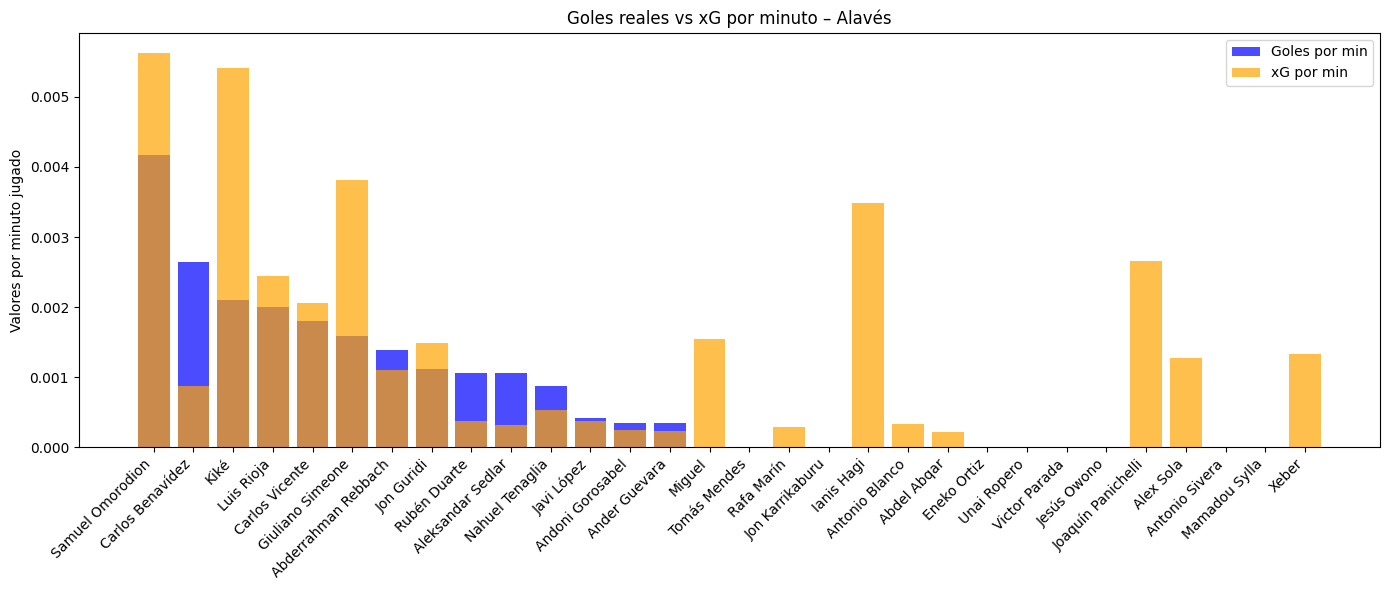

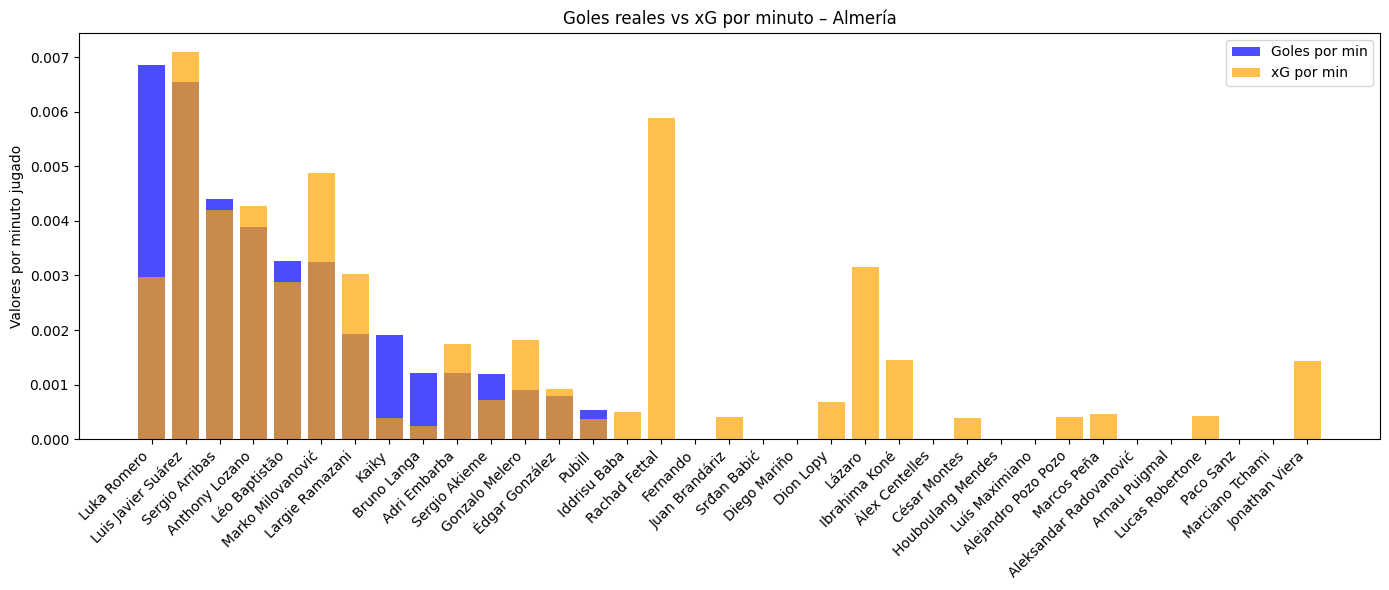

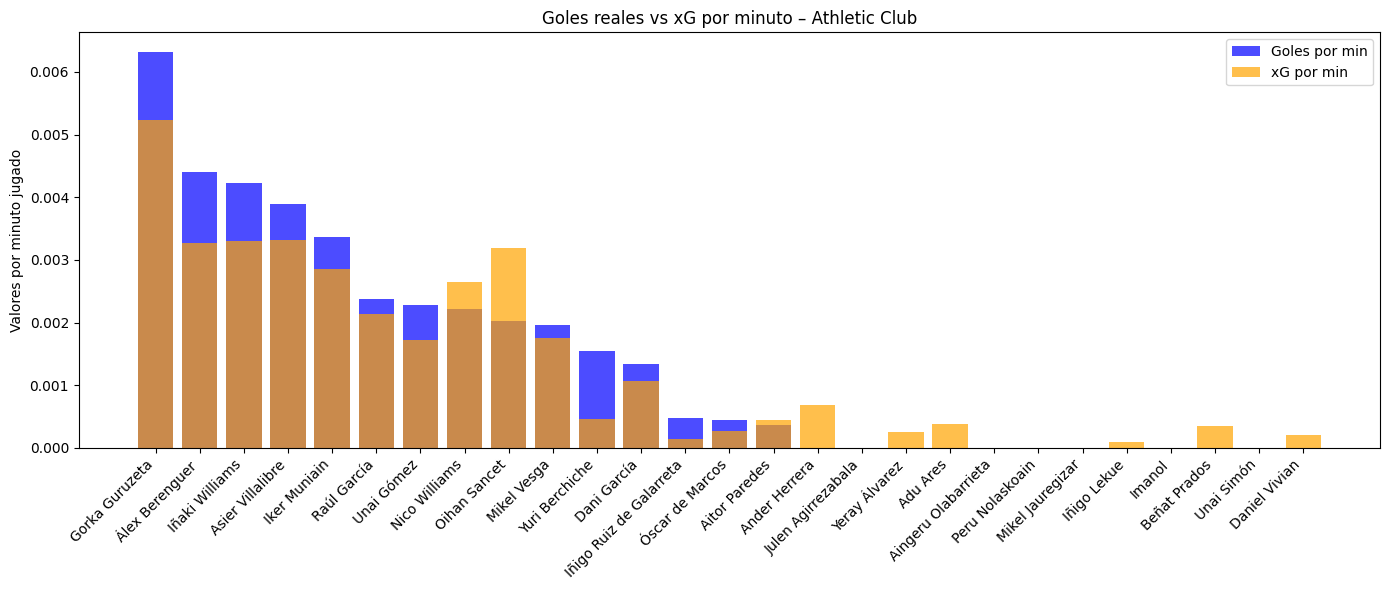

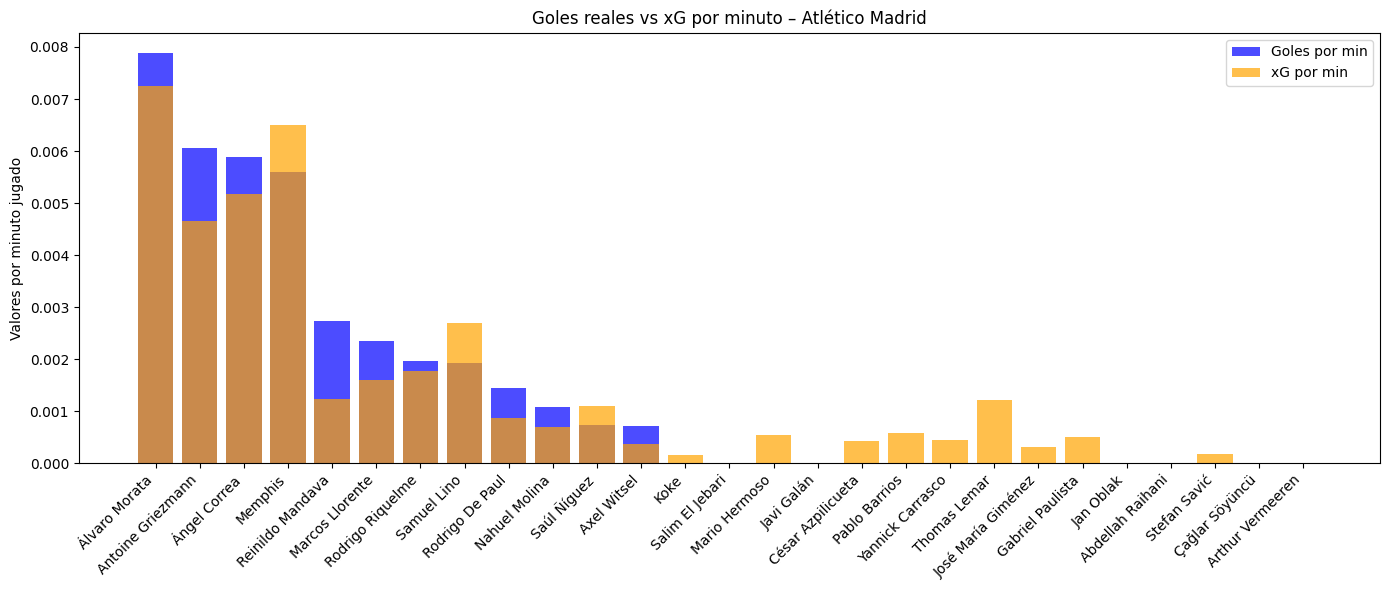

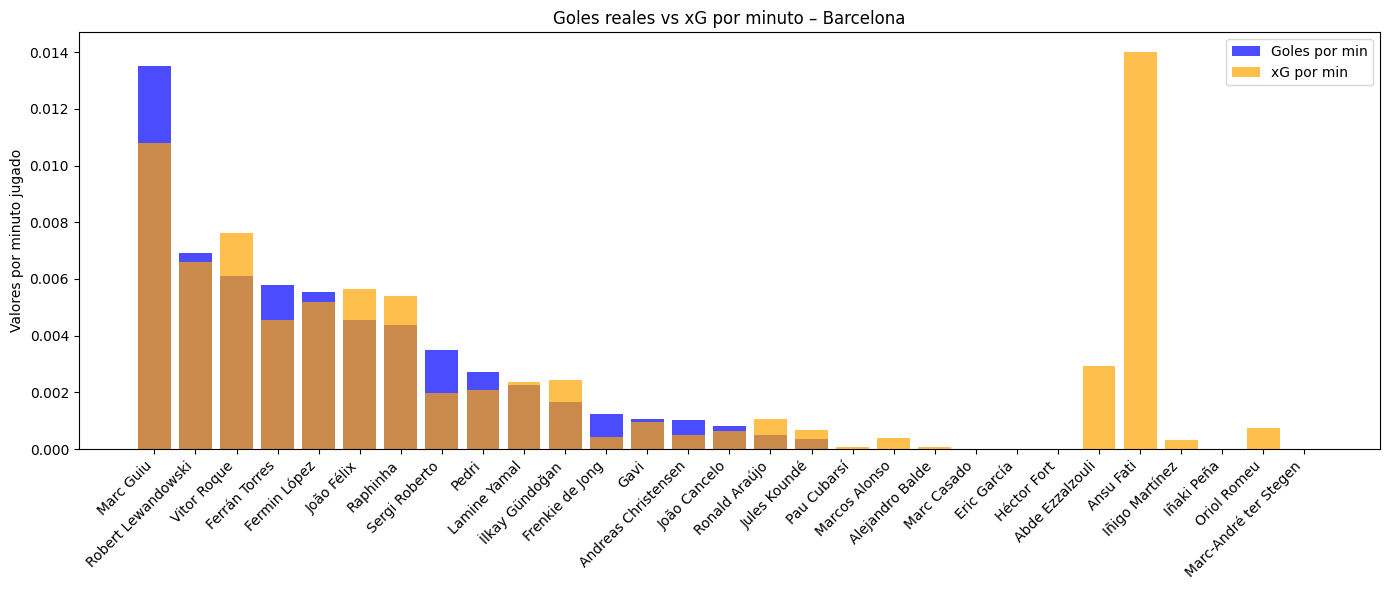

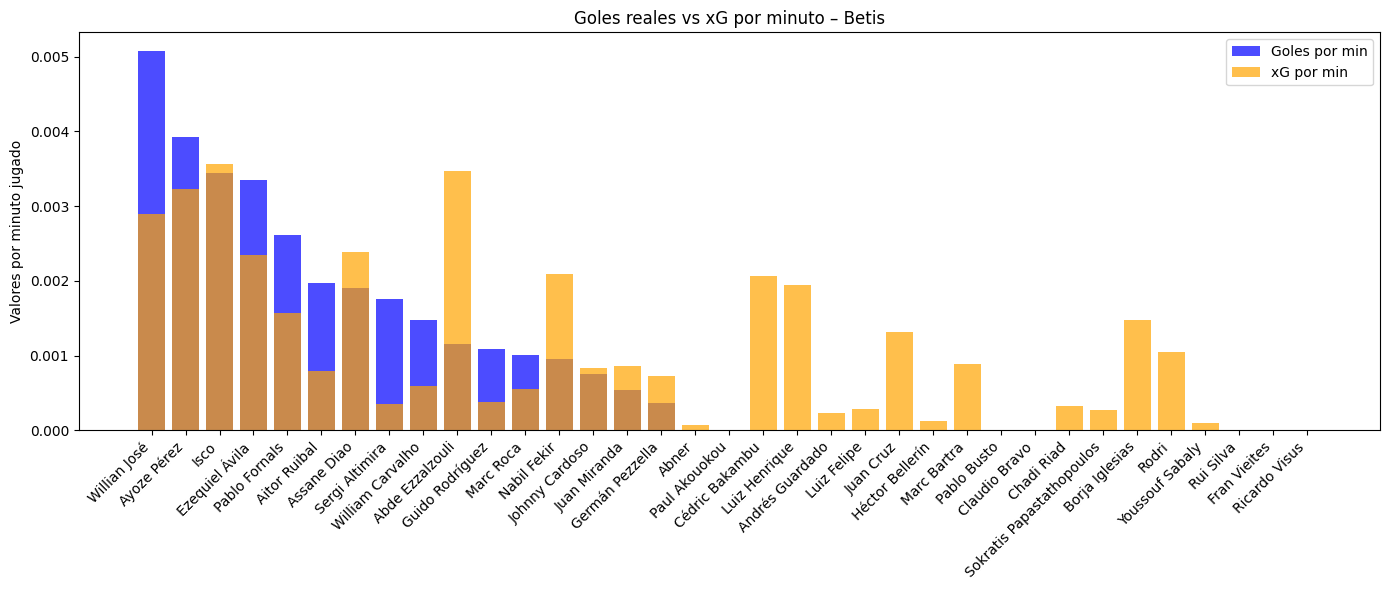

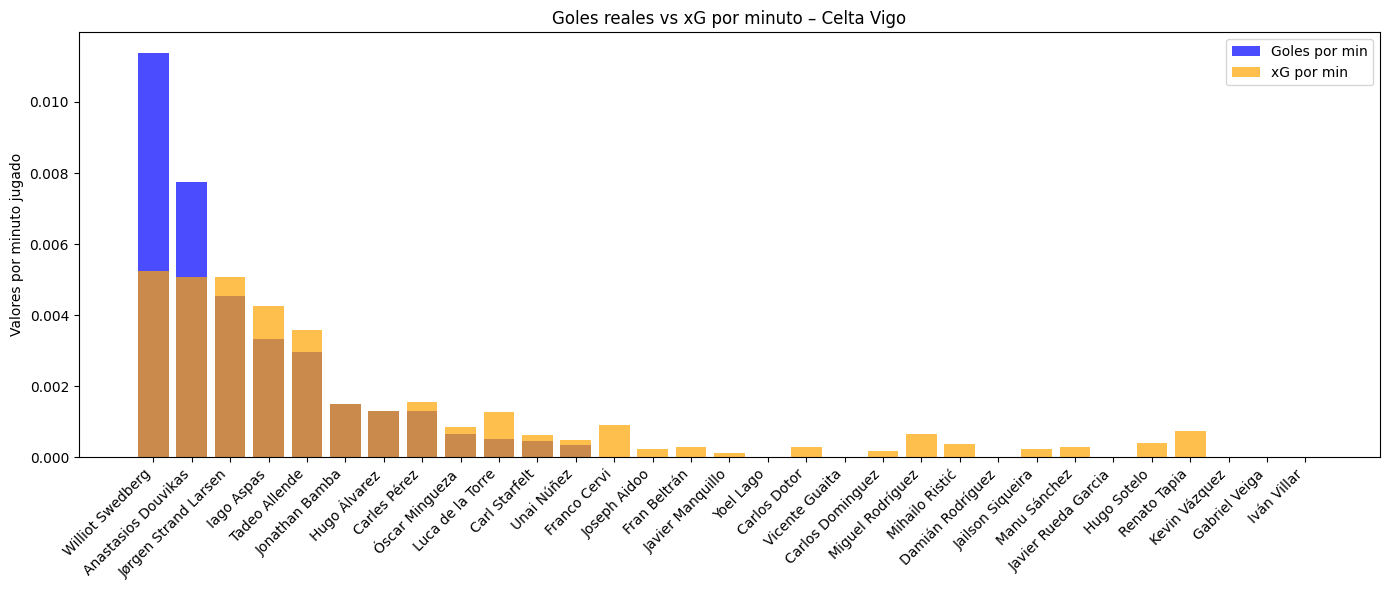

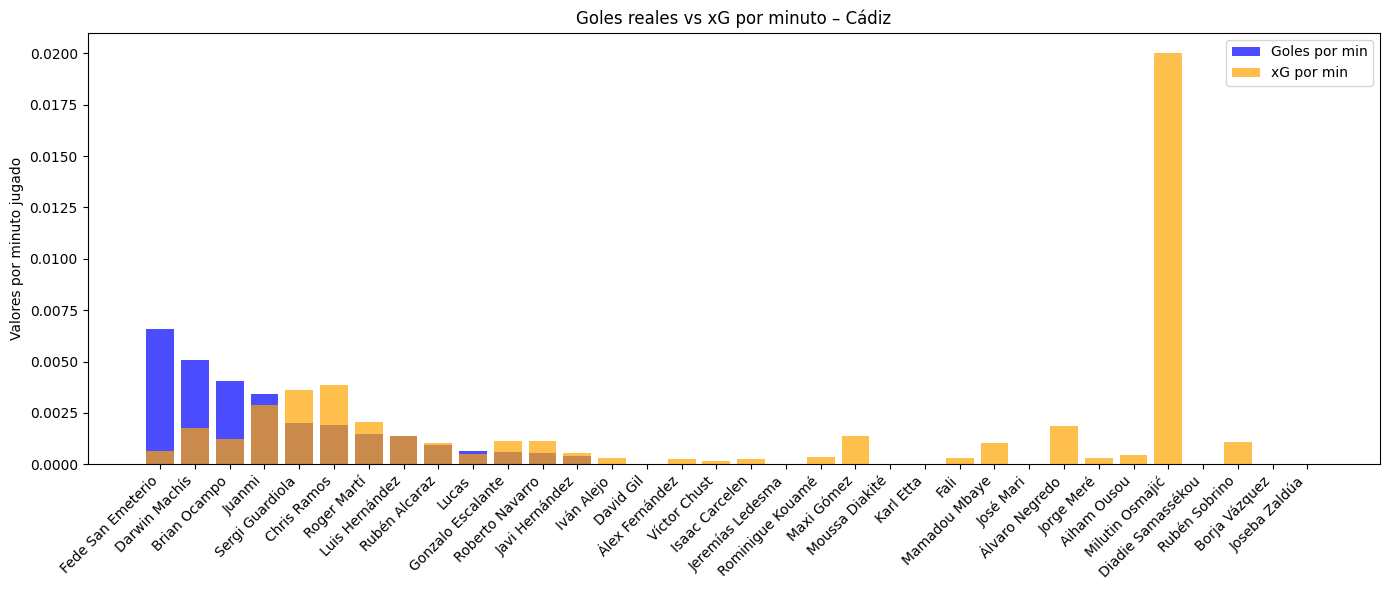

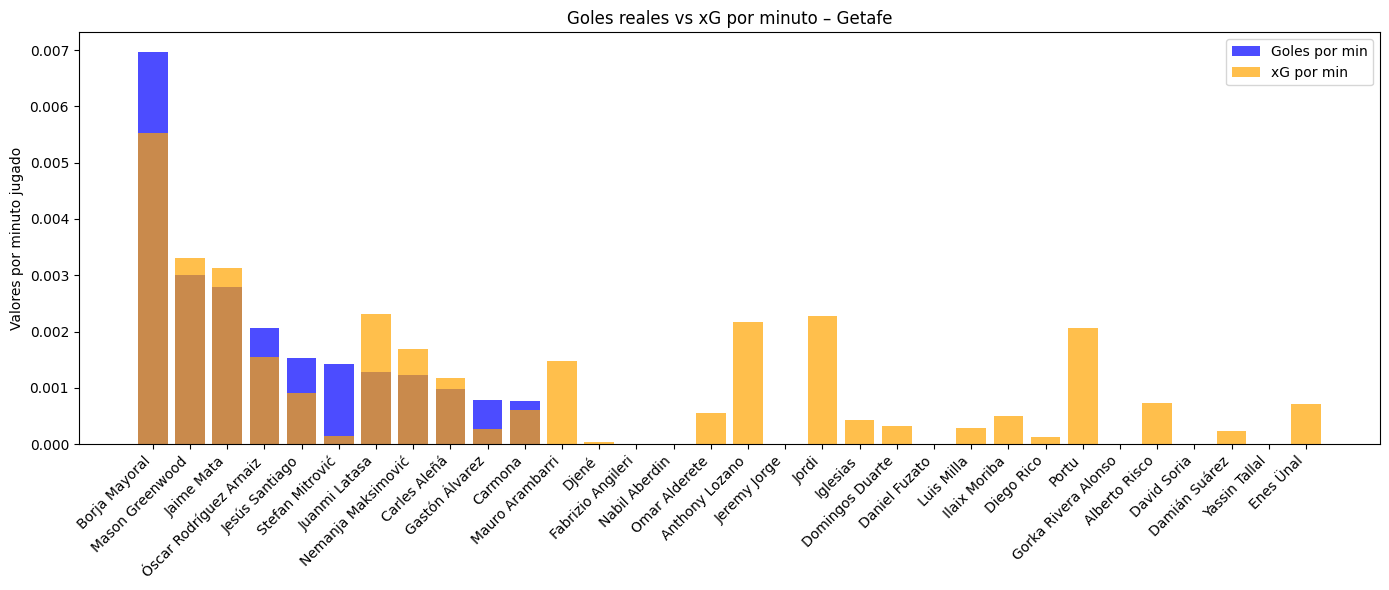

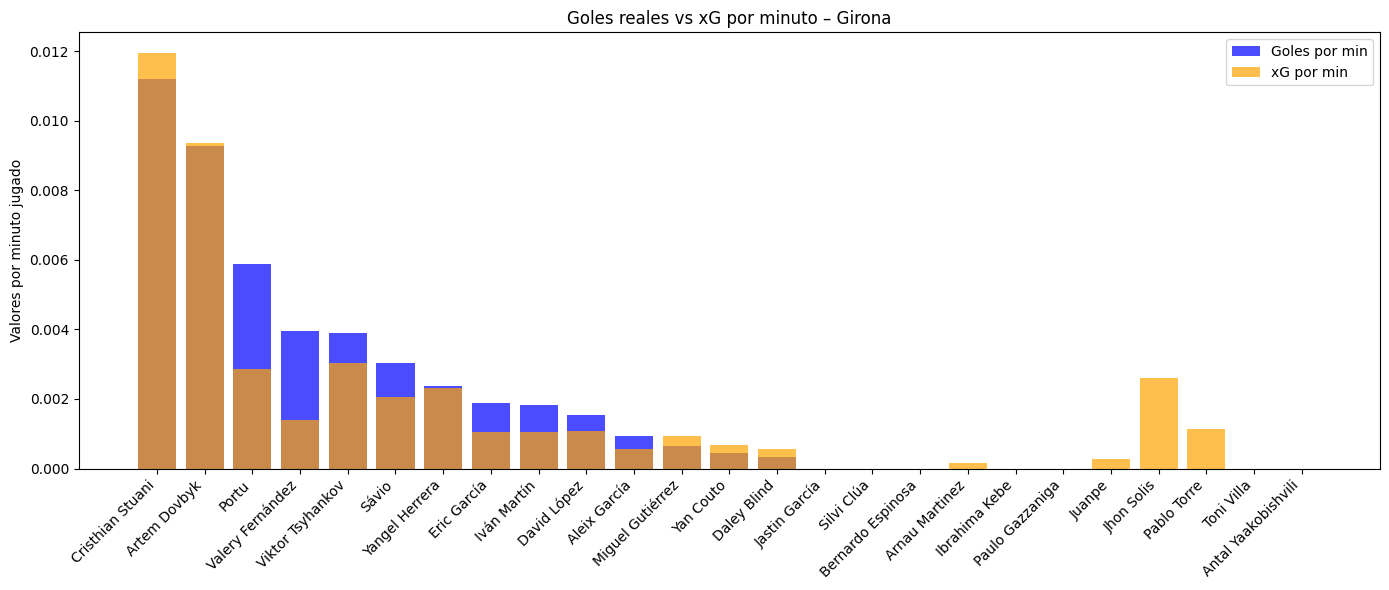

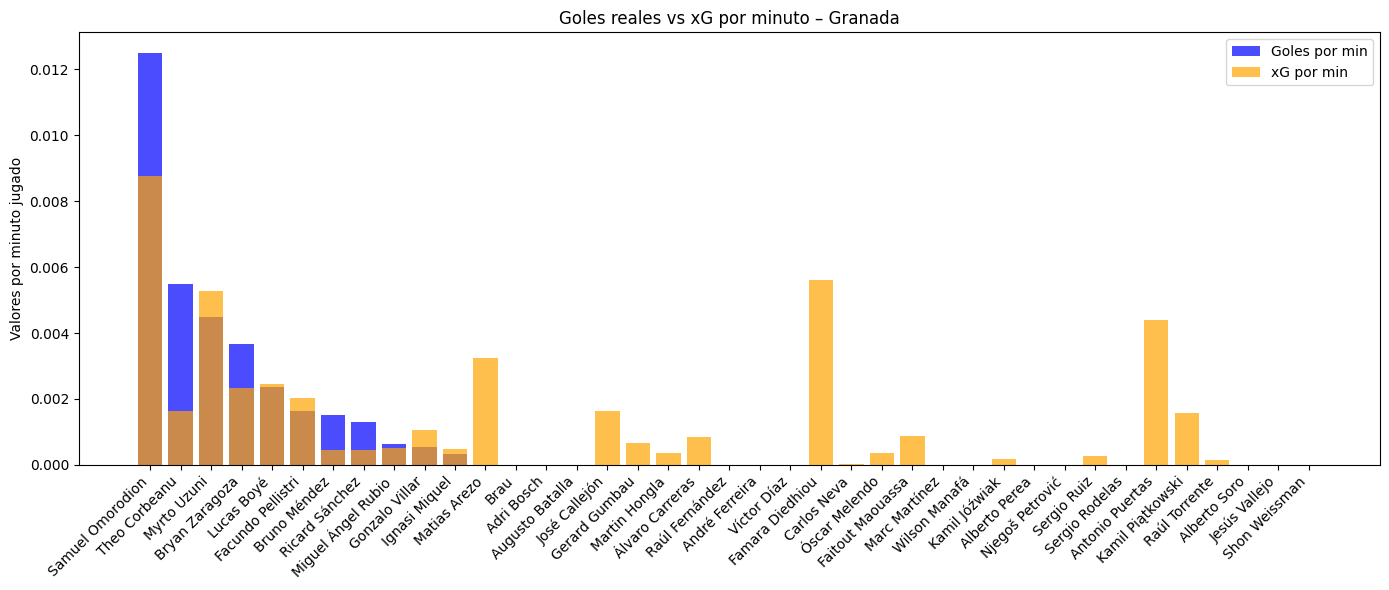

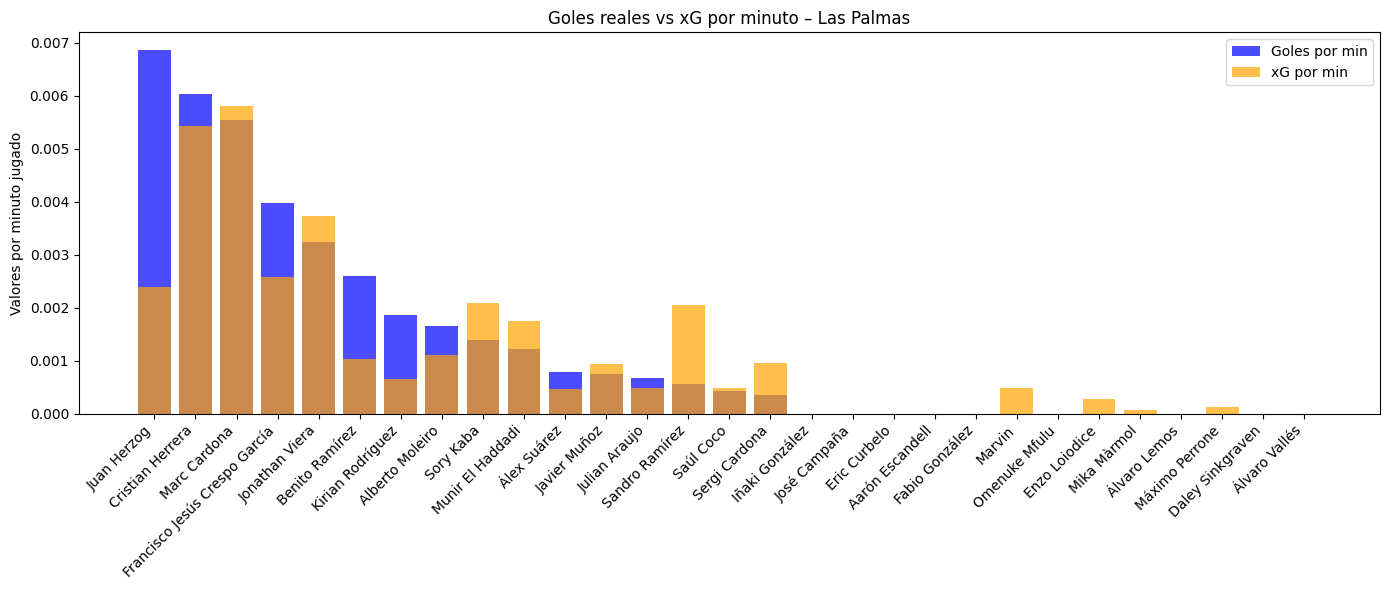

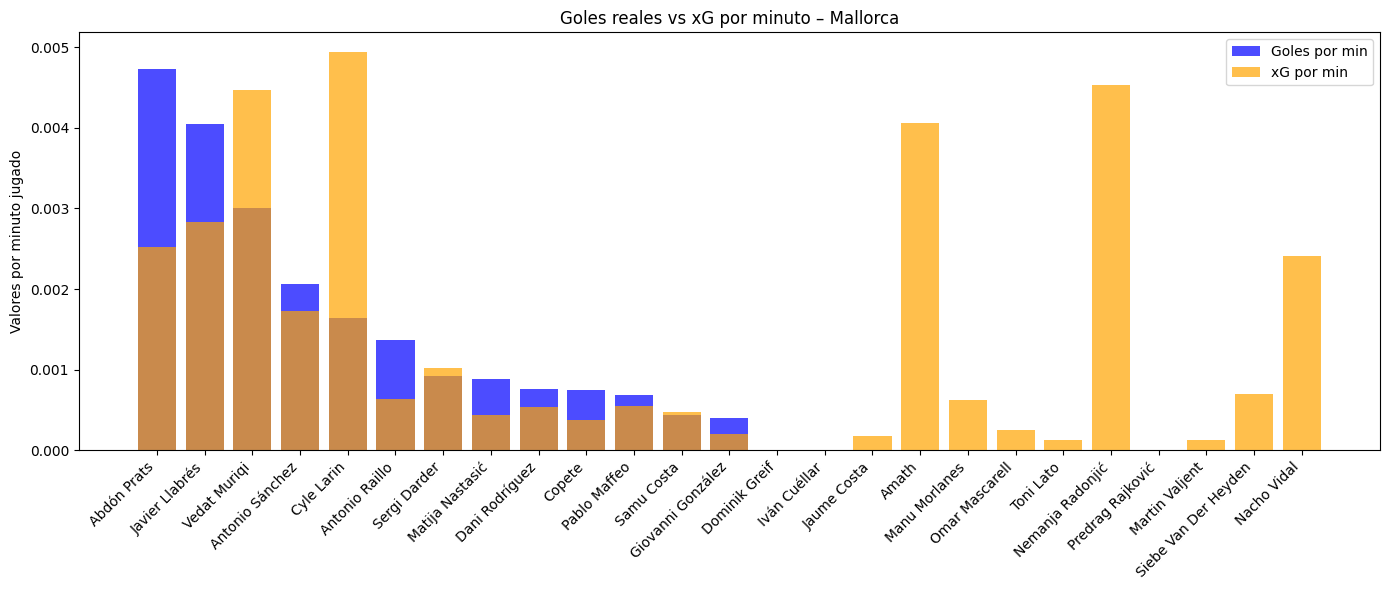

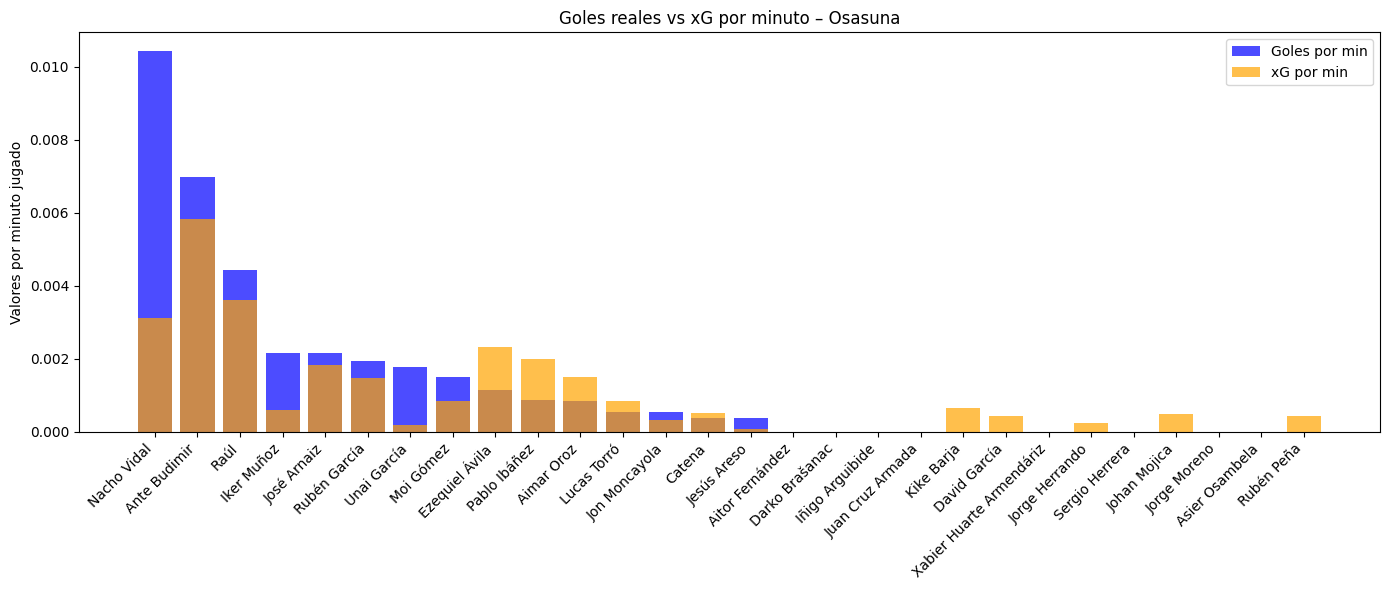

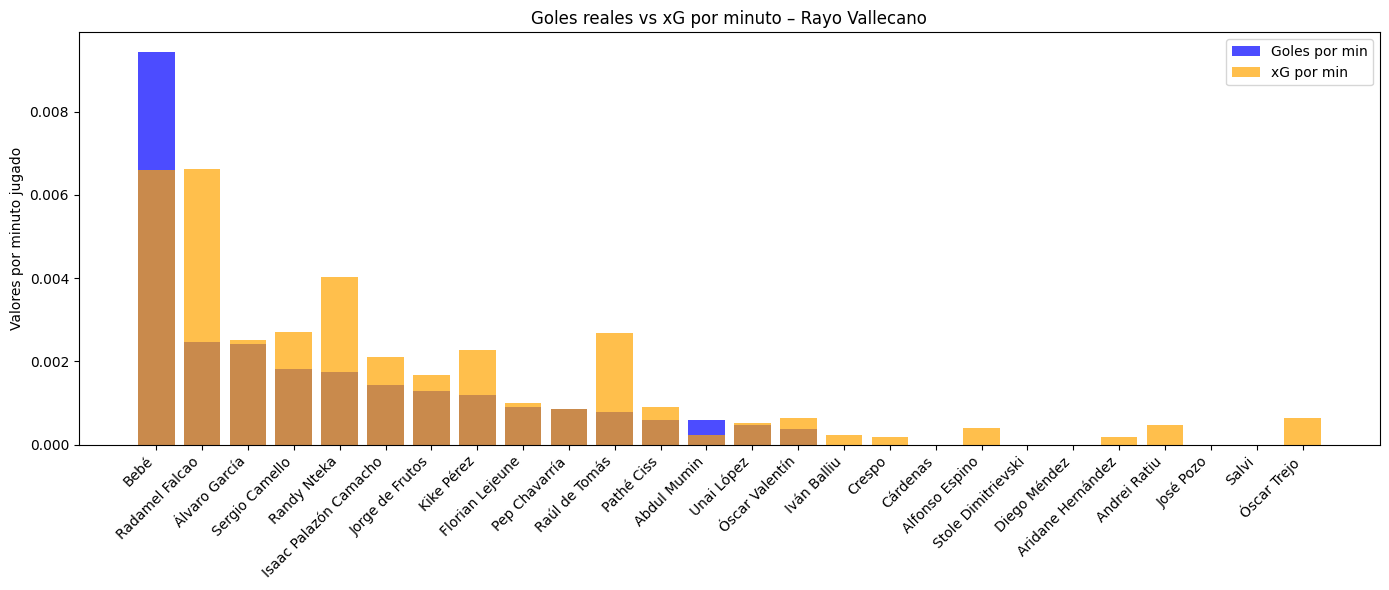

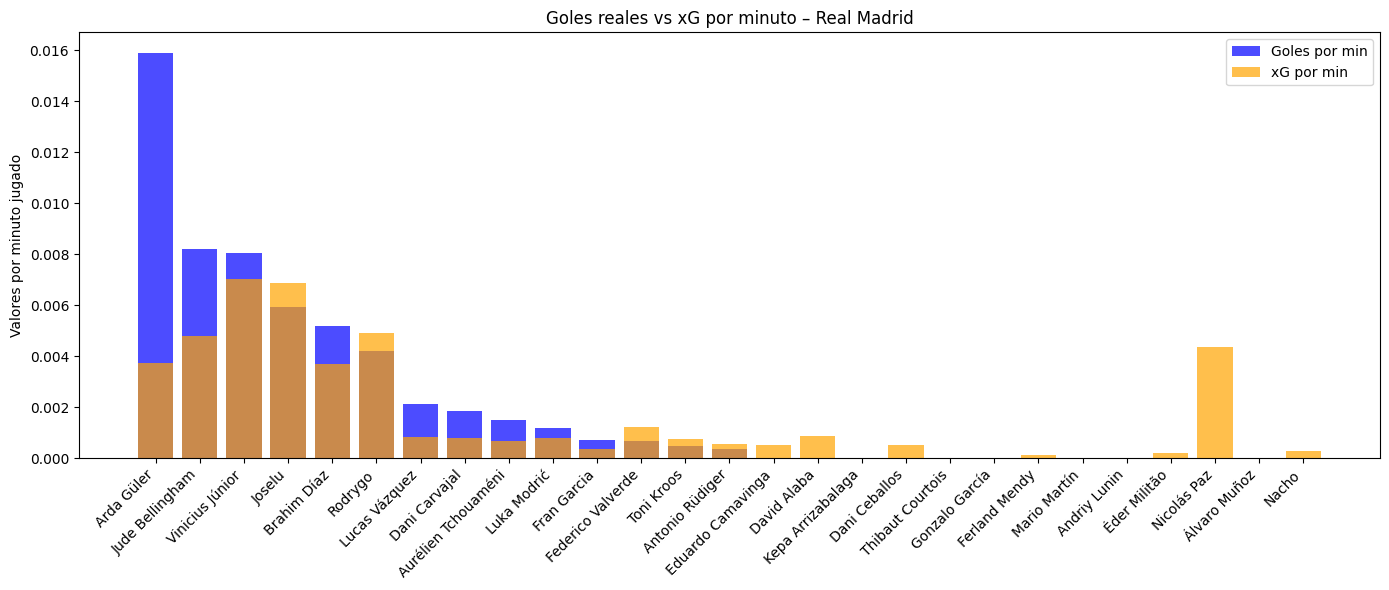

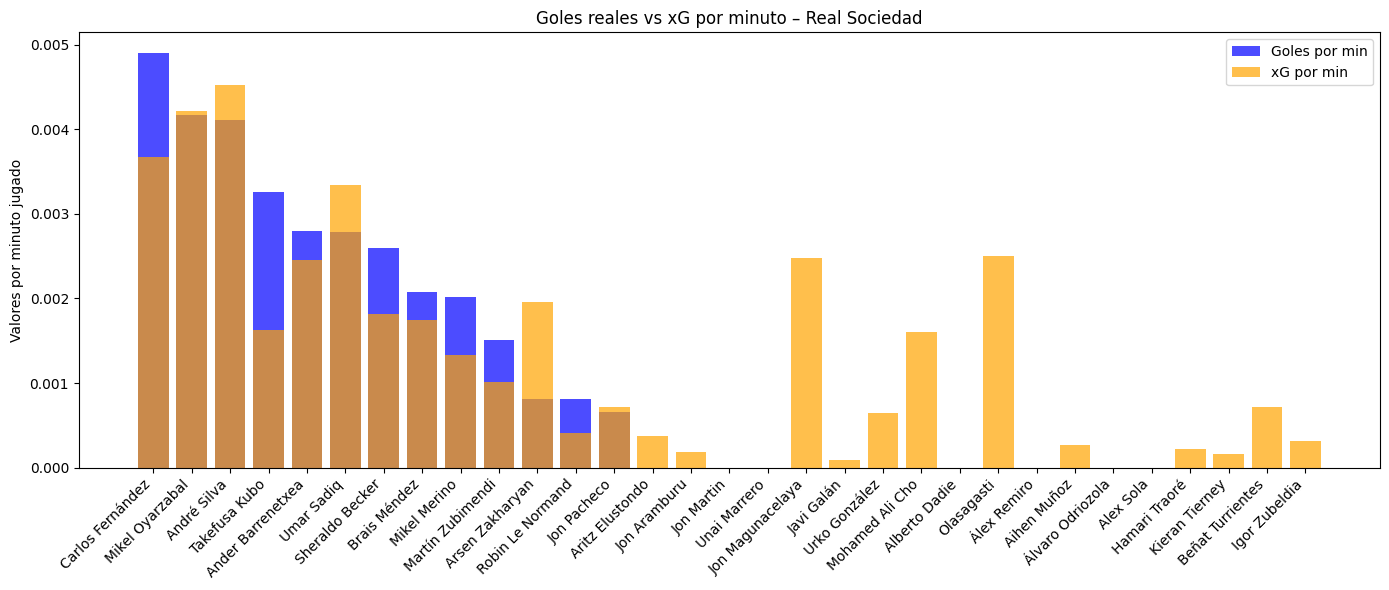

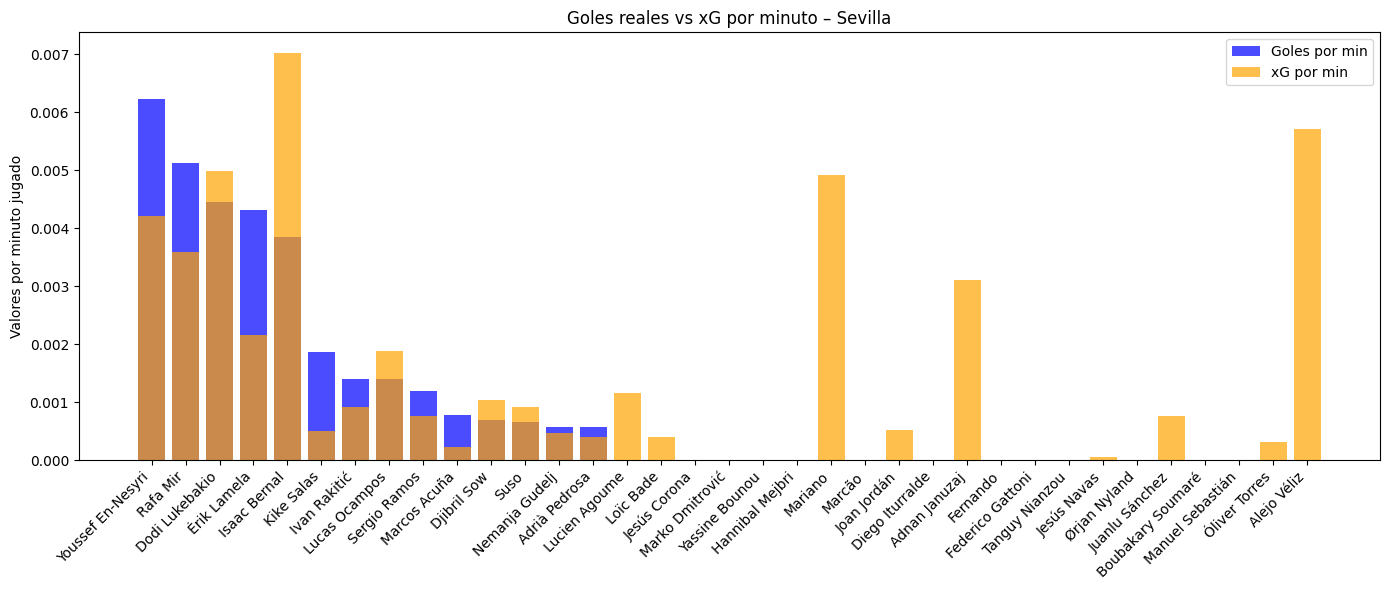

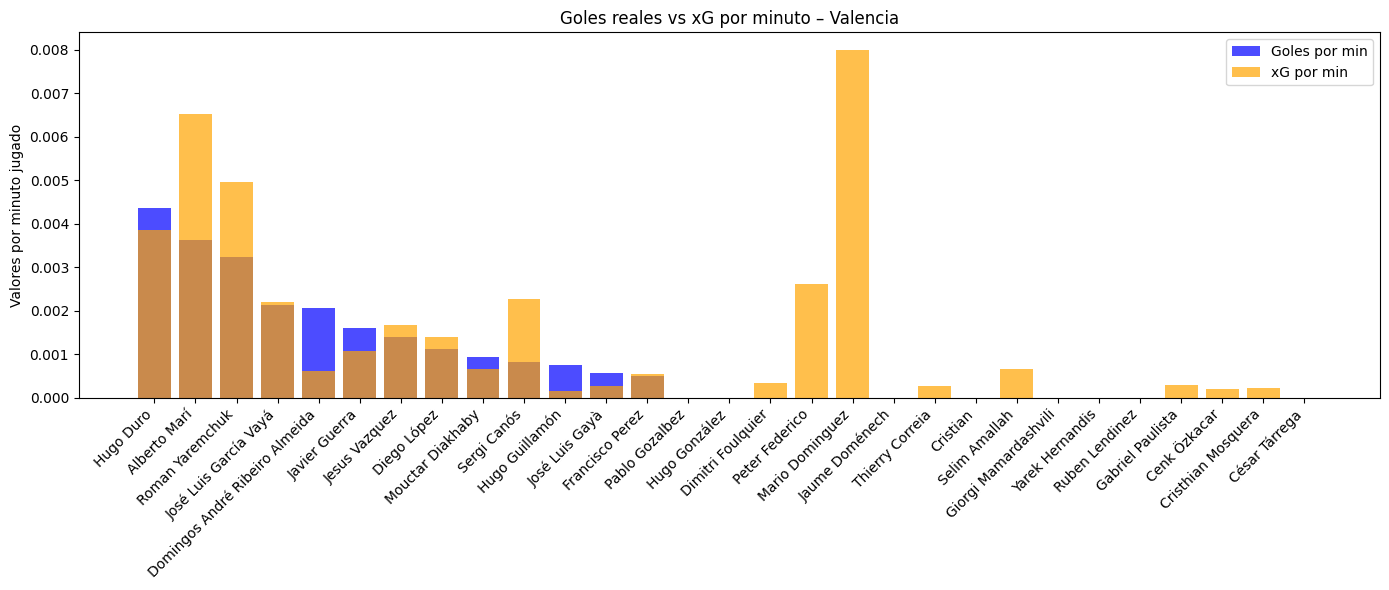

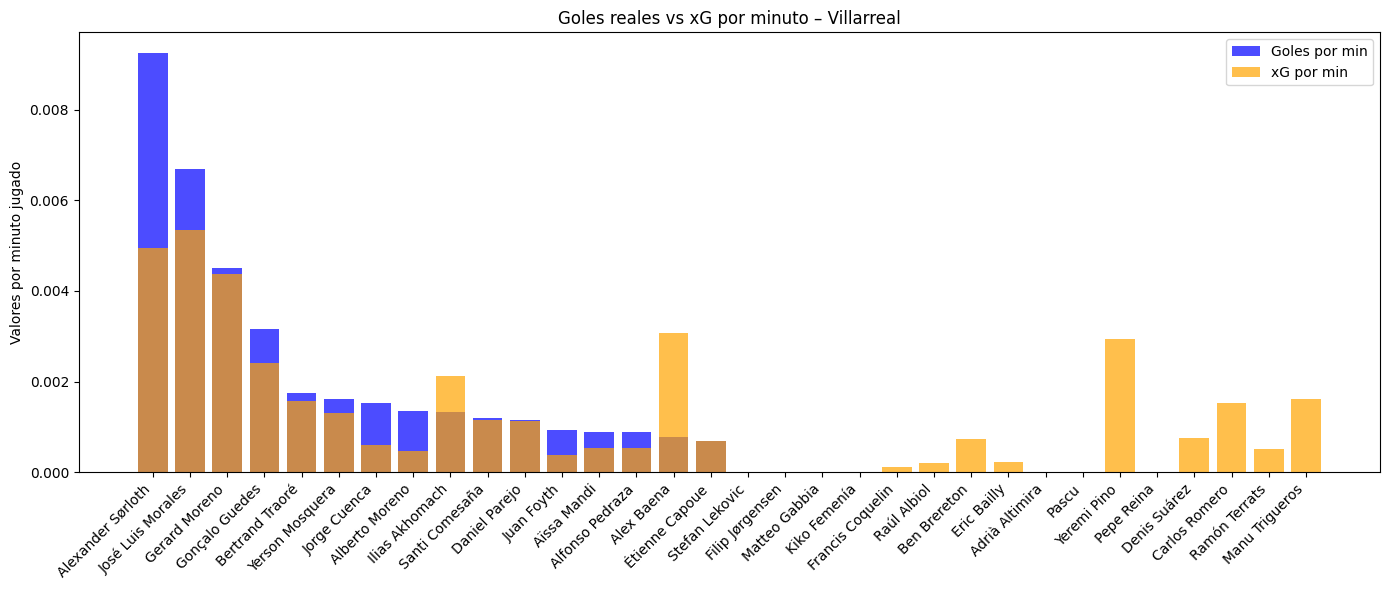

In [27]:
df_espa = df[df['Competition'] == 'es La Liga'].copy()
equipos = df_espa.groupby('Squad').agg('count').index

for e in equipos:

    # Filtrar solo jugadores del equipo X
    df_rm = df_espa[df_espa['Squad'] == f'{e}'].copy()

    # Calcular métricas
    df_rm['Goles_por_min'] = df_rm['Performance_Gls'] / df_rm['Playing Time_Min']
    df_rm['GolesEsperados_por_min'] = df_rm['Expected_xG'] / df_rm['Playing Time_Min']

    # Ordenar por goles reales por minuto (para que el gráfico sea más intuitivo)
    df_rm = df_rm.sort_values('Goles_por_min', ascending=False)

    # Crear el gráfico combinado
    plt.figure(figsize=(14,6))

    # Barras: Goles reales por minuto
    plt.bar(df_rm['Player'], df_rm['Goles_por_min'], color='blue', alpha=0.7, label='Goles por min')

    # Barras sobrepuestas: xG por minuto
    plt.bar(df_rm['Player'], df_rm['GolesEsperados_por_min'], color='orange', alpha=0.7, label='xG por min')

    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Valores por minuto jugado')
    plt.title(f'Goles reales vs xG por minuto – {e}')
    plt.legend()
    plt.tight_layout()
    plt.show()

### Nos disponemos a realizar un grafico que ponga en común el rendimiento REAL con el ESPERADO 

In [28]:
import pandas as pd

# Filtrar solo La Liga
df_espa = df[df['Competition'] == 'es La Liga'].copy()

# Crear columnas globales
df_espa['Goles_por_min'] = df_espa['Performance_Gls'] / df_espa['Playing Time_Min']
df_espa['xG_por_min'] = df_espa['Expected_xG'] / df_espa['Playing Time_Min']
df_espa['Diferencia'] = df_espa['Goles_por_min'] - df_espa['xG_por_min']

# Limpiar jugadores con 0 minutos (evita división por cero)
df_espa = df_espa[df_espa['Playing Time_Min'] > 0]

# Seleccionar solo columnas útiles
tabla_global = df_espa[['Player', 'Squad', 'Playing Time_Min',
                        'Performance_Gls', 'Expected_xG',
                        'Goles_por_min', 'xG_por_min', 'Diferencia', 'Position']].copy()

# Ordenar por eficiencia (más goleadores por minuto arriba)
tabla_global = tabla_global.sort_values('Goles_por_min', ascending=False)

tabla_global.head(20)


Player            Squad  Playing Time_Min  Performance_Gls  \
1066           Arda Güler      Real Madrid               377                6   
1063            Marc Guiu        Barcelona                74                1   
1969     Samuel Omorodion          Granada                80                1   
2523     Williot Swedberg       Celta Vigo               439                5   
2511     Cristhian Stuani           Girona               804                9   
2689          Nacho Vidal          Osasuna                96                1   
241                  Bebé   Rayo Vallecano               212                2   
766          Artem Dovbyk           Girona              2587               24   
2534    Alexander Sørloth       Villarreal              2489               23   
265       Jude Bellingham      Real Madrid              2315               19   
1263      Vinicius Júnior      Real Madrid              1864               15   
1796        Álvaro Morata  Atlético Madrid              1904               15   
765   Anastasios Douvikas       Celta Vigo               905                7   
400          Ante Budimir          Osasuna              2435               17   
1677        Borja Mayoral           Getafe              2153               15   
1470   Robert Lewandowski        Barcelona              2750               19   
1136          Juan Herzog       Las Palmas               292                2   
2265          Luka Romero          Almería               438                3   
1528    José Luis Morales       Villarreal              1048                7   
2323    Fede San Emeterio            Cádiz               152                1   

      Expected_xG  Goles_por_min  xG_por_min  Diferencia Position  
1066          1.4       0.015915    0.003714    0.012202    FW,MF  
1063          0.8       0.013514    0.010811    0.002703    FW,MF  
1969          0.7         0.0125     0.00875     0.00375       FW  
2523          2.3        0.01139    0.005239     0.00615    FW,MF  
2511          9.6       0.011194     0.01194   -0.000746       FW  
2689          0.3       0.010417    0.003125    0.007292    DF,FW  
241           1.4       0.009434    0.006604     0.00283    MF,FW  
766          24.2       0.009277    0.009354   -0.000077       FW  
2534         12.3       0.009241    0.004942    0.004299       FW  
265          11.1       0.008207    0.004795    0.003413       MF  
1263         13.1       0.008047    0.007028    0.001019       FW  
1796         13.8       0.007878    0.007248     0.00063       FW  
765           4.6       0.007735    0.005083    0.002652       FW  
400          14.2       0.006982    0.005832     0.00115       FW  
1677         11.9       0.006967    0.005527     0.00144       FW  
1470         18.1       0.006909    0.006582    0.000327       FW  
1136          0.7       0.006849    0.002397    0.004452       DF  
2265          1.3       0.006849    0.002968    0.003881       FW  
1528          5.6       0.006679    0.005344    0.001336    FW,MF  
2323          0.1       0.006579    0.000658    0.005921       MF

In [29]:
tabla_global['Diferencia'].sum()

np.float64(-0.1146726467671424)

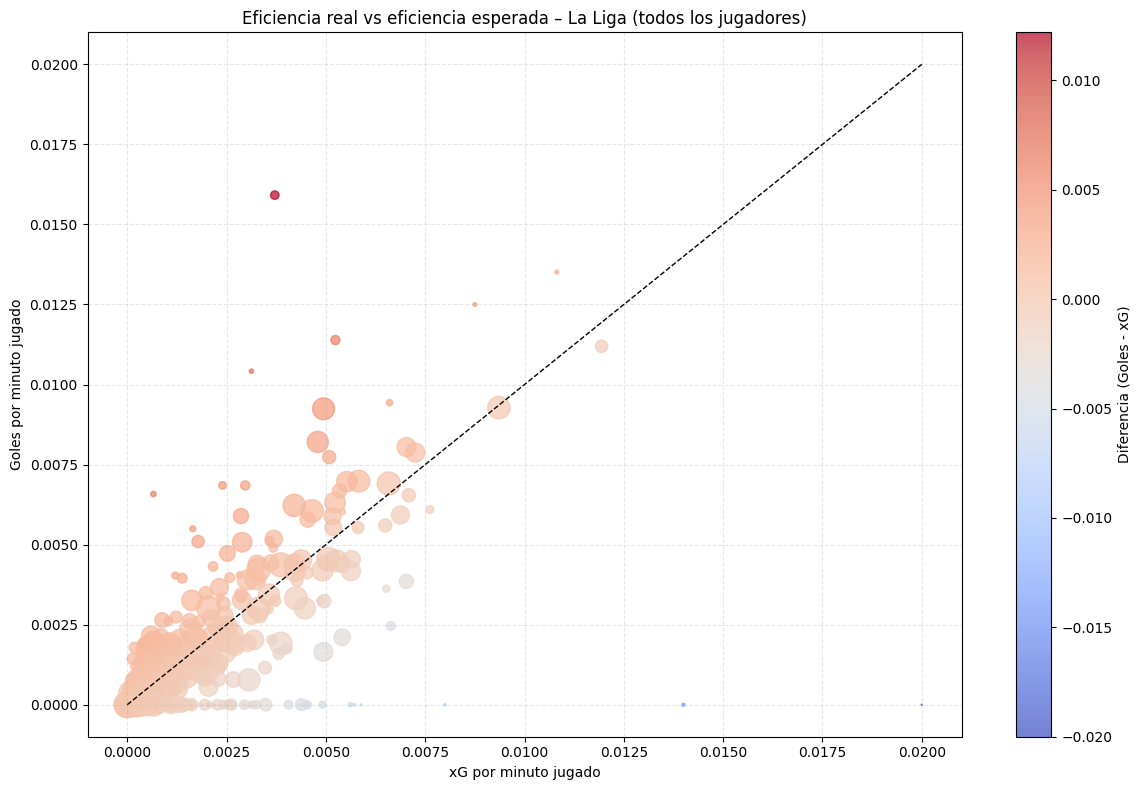

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar datos
df_plot = tabla_global.copy()

plt.figure(figsize=(12, 8))

# Crear scatter plot
scatter = plt.scatter(
    df_plot["xG_por_min"],
    df_plot["Goles_por_min"],
    c=df_plot["Diferencia"],
    cmap="coolwarm",
    s=df_plot["Playing Time_Min"] / 10,  # tamaño proporcional
    alpha=0.7
)

# Línea diagonal x=y
max_val = max(df_plot["xG_por_min"].max(), df_plot["Goles_por_min"].max())
plt.plot([0, max_val], [0, max_val], 'k--', linewidth=1)

plt.colorbar(scatter, label="Diferencia (Goles - xG)")
plt.xlabel("xG por minuto jugado")
plt.ylabel("Goles por minuto jugado")
plt.title("Eficiencia real vs eficiencia esperada – La Liga (todos los jugadores)")

plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()



### 1. Eje X: xG por minuto jugado

    Puntos muy a la derecha → jugadores que generan muchas ocasiones.

    Puntos hacia la izquierda → jugadores que casi no generan peligro.


### 2. Eje Y: Goles por minuto jugado

    Cuanto más arriba → más goleador es el jugador.

    Cuanto más abajo → menos marca.


### 3. Línea diagonal (x = y), es la línea del rendimiento perfecto.

    Si un jugador está encima de la línea, marca más de lo esperado → sobrerendimiento.

    Si está debajo, convierte menos de lo esperado → subrendimiento.


### 4. Color del punto: Diferencia (Goles − xG)

    🔴 Rojo = supera lo esperado (marcó más de lo que debería)

    🔵 Azul = rinde por debajo (falló más de lo que debería)

    ⚪ Gris = rendimiento normal

Mientras más rojo → más eficiente.
Mientras más azul → peor puntería o mala suerte. 

### Aqui hacemos otra vez lo mismo pero aplicando un filtro en el cual solo tomamos los jugadores que han disputado mas de 600 minutos jugados (unos 7 partidos)

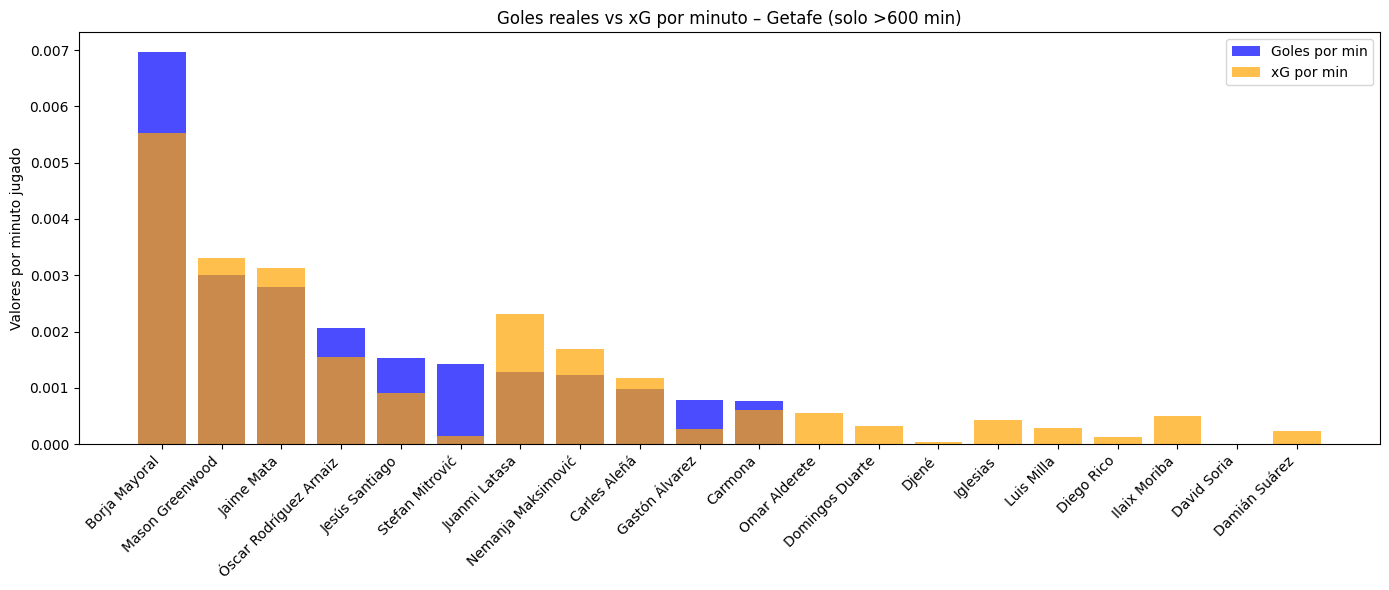

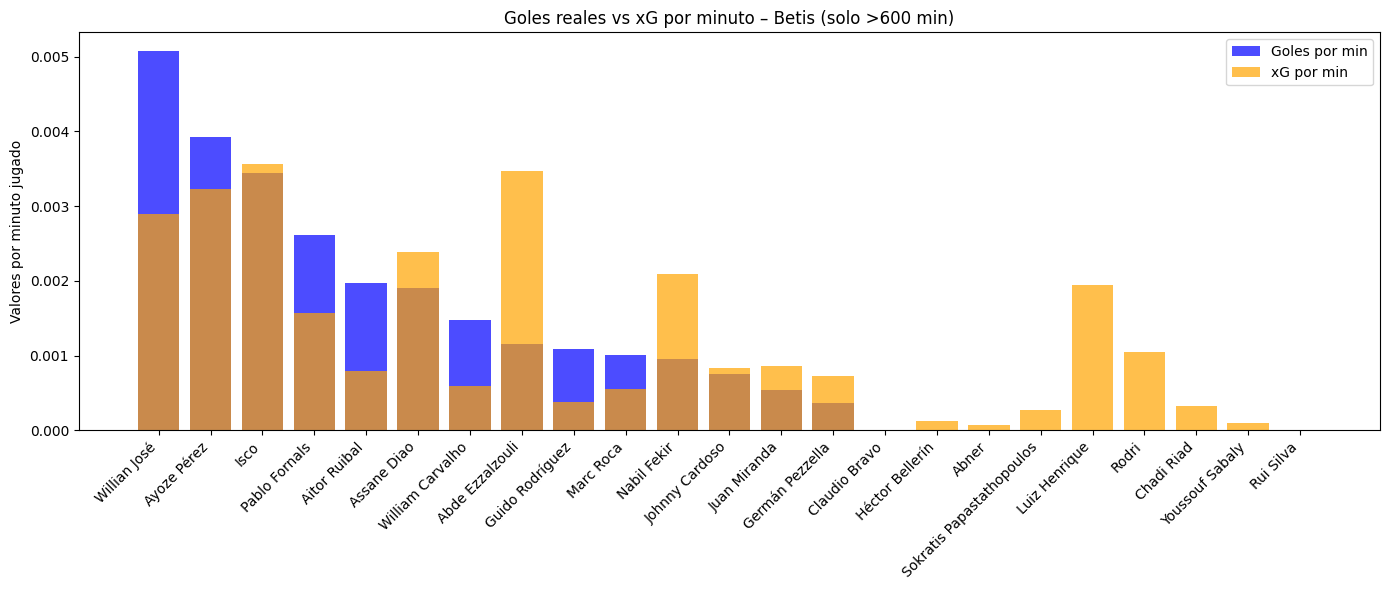

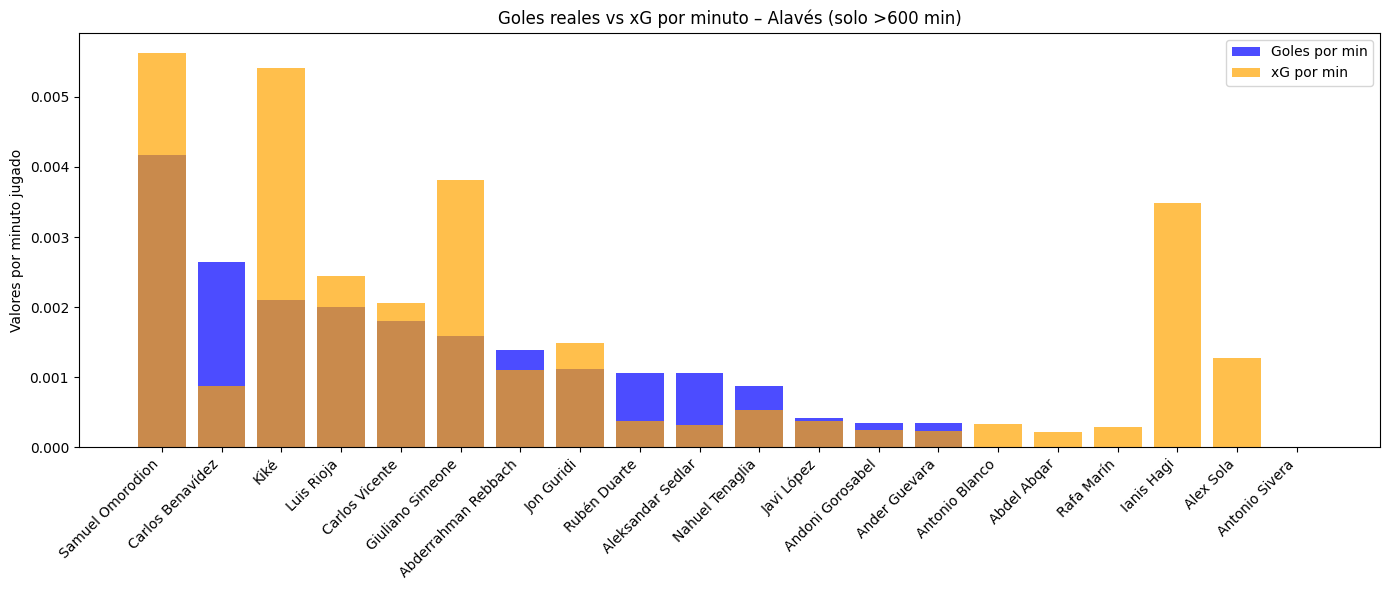

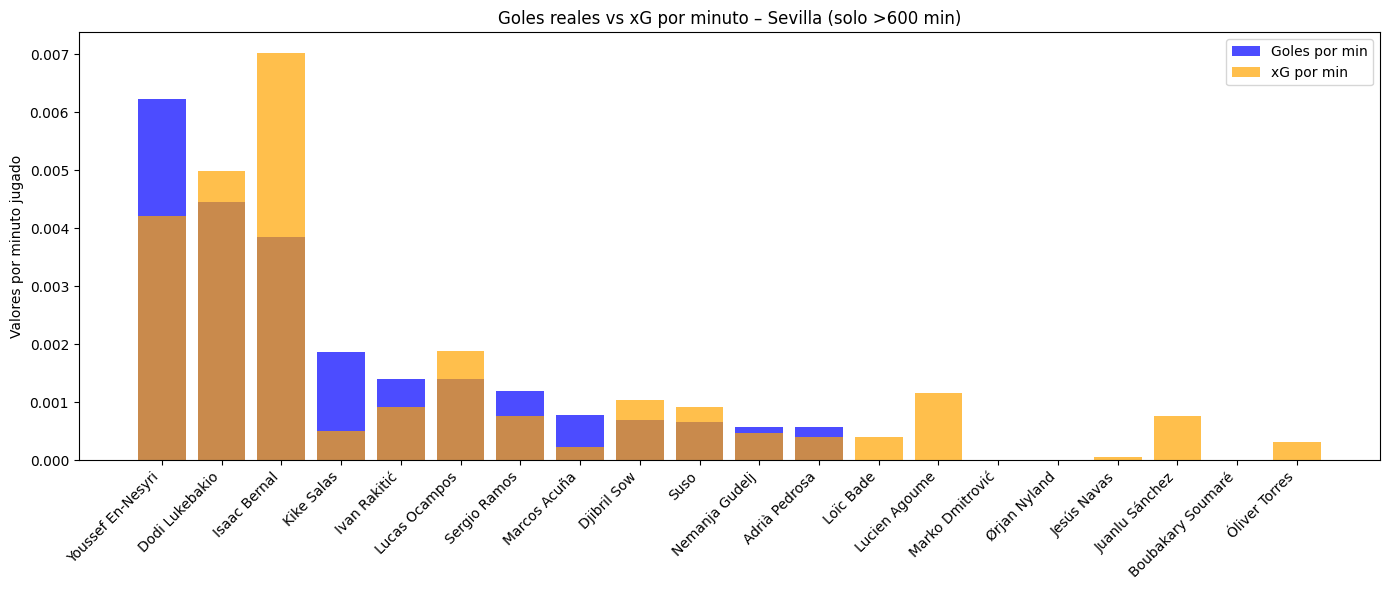

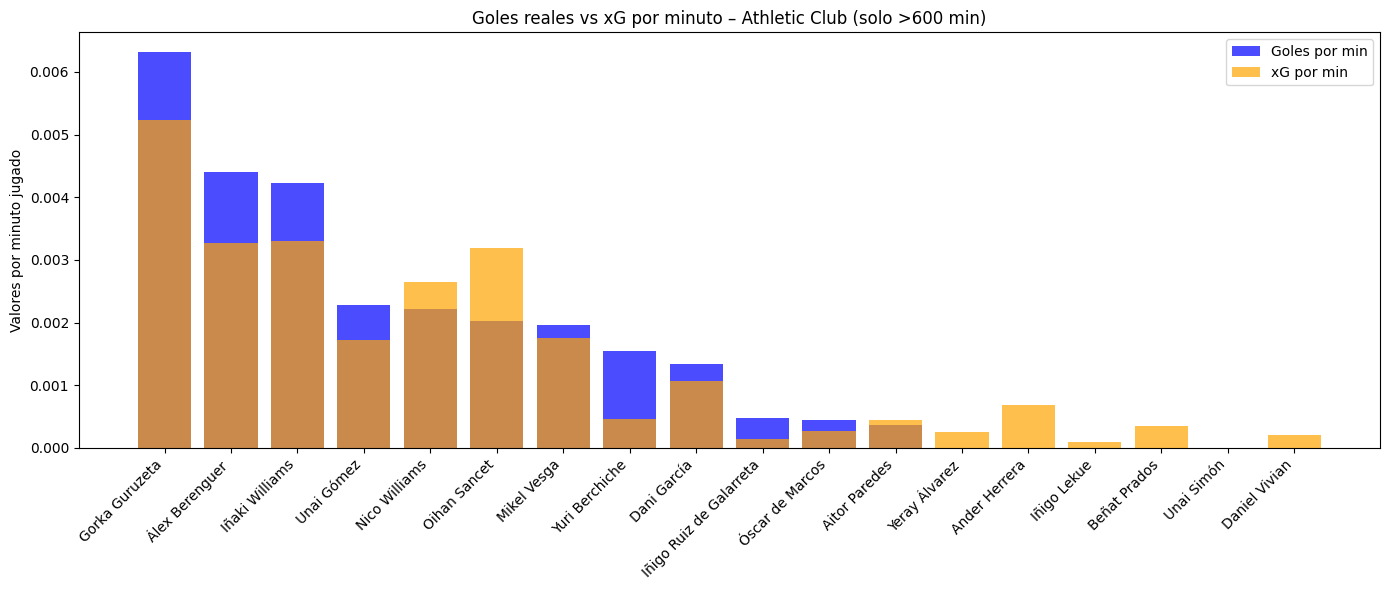

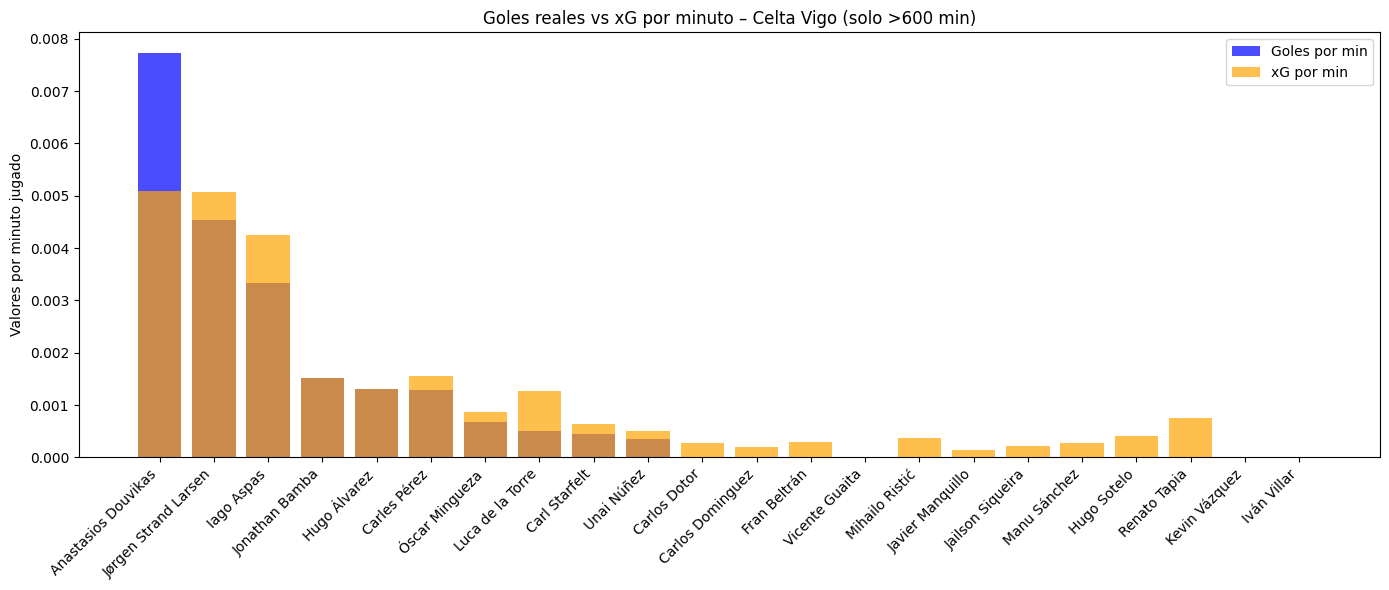

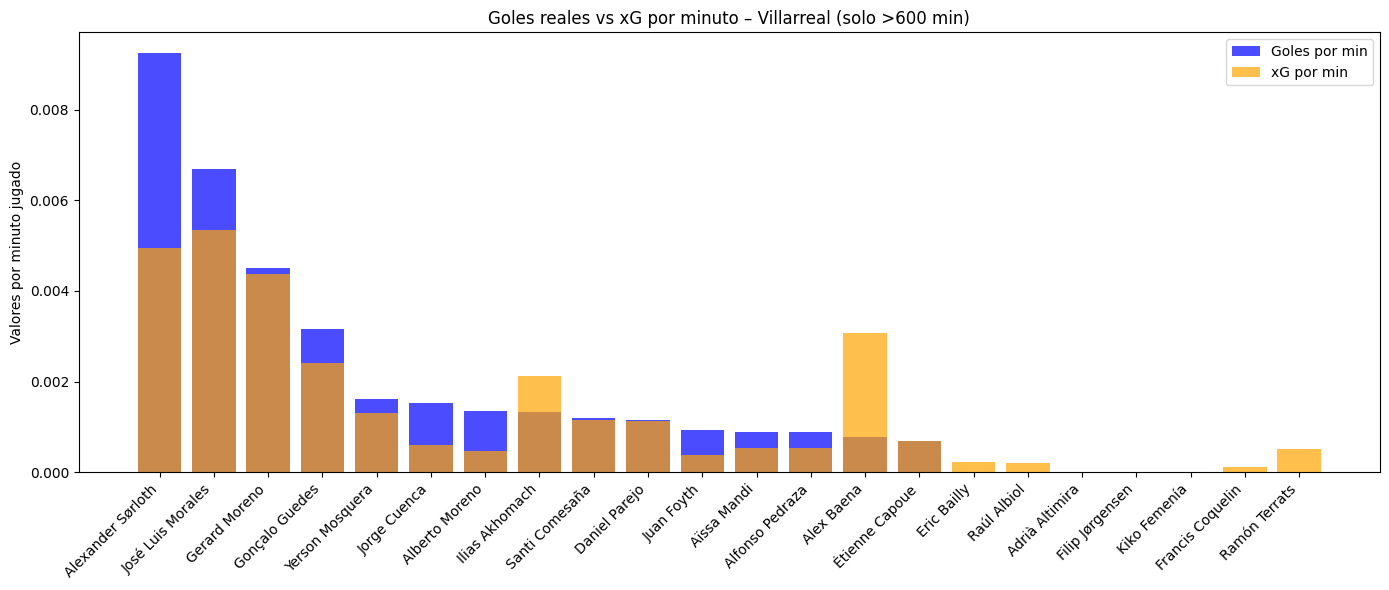

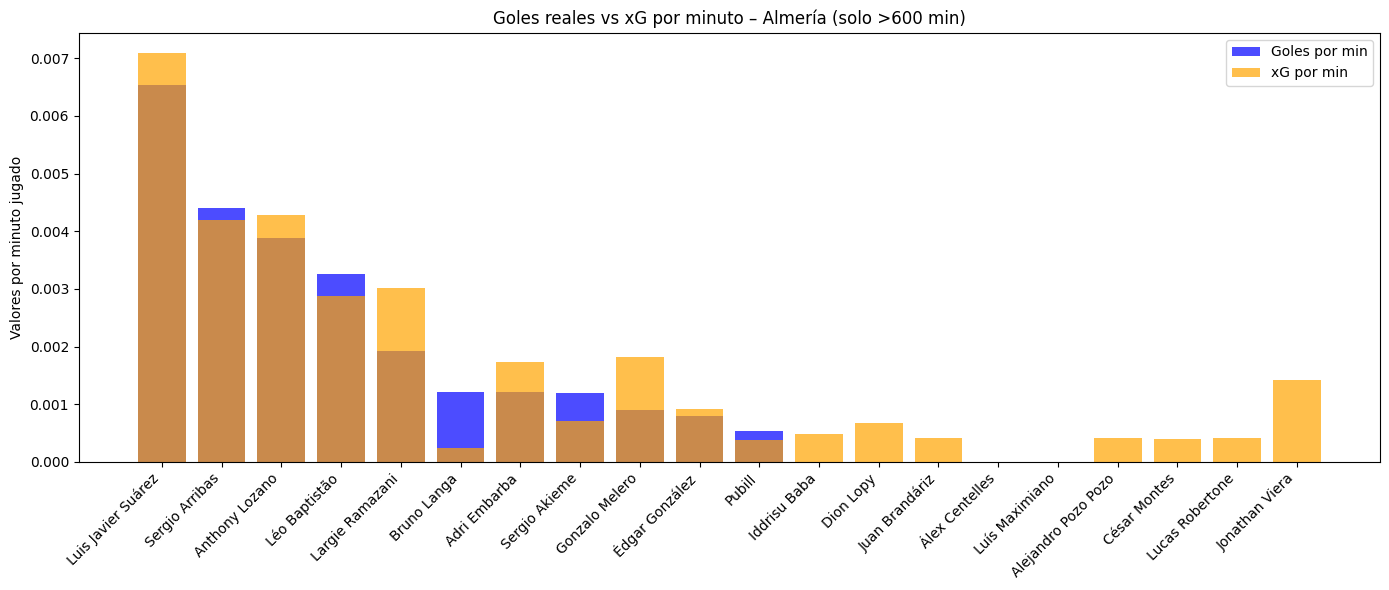

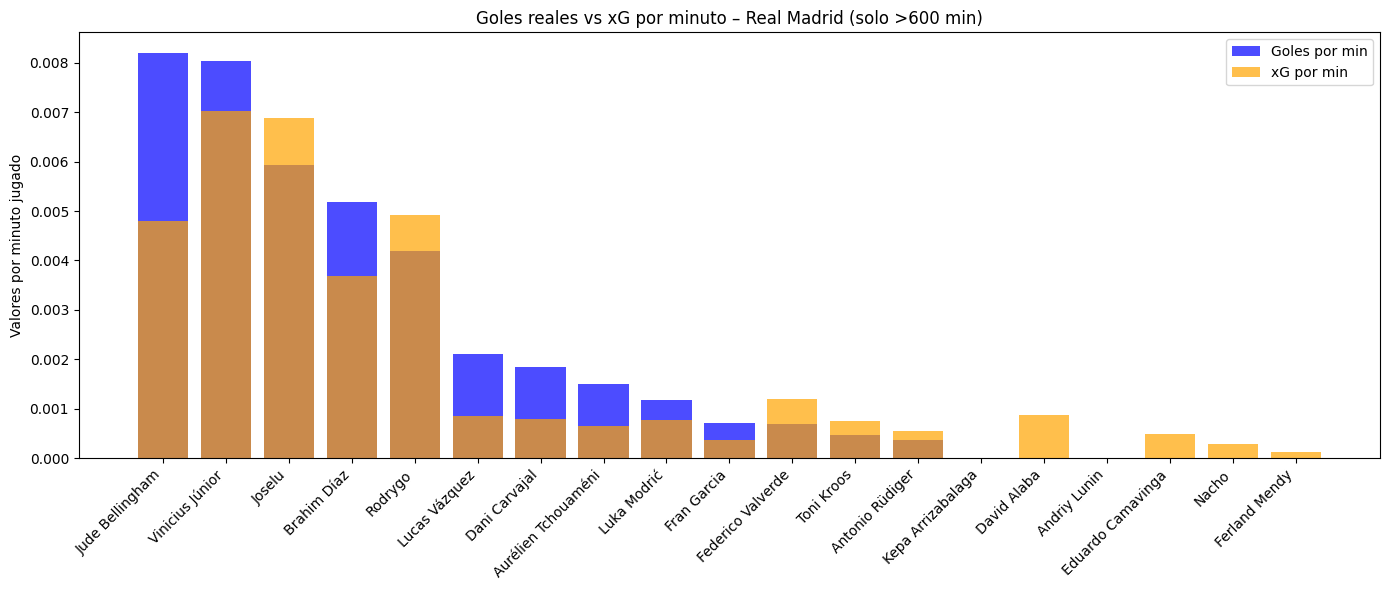

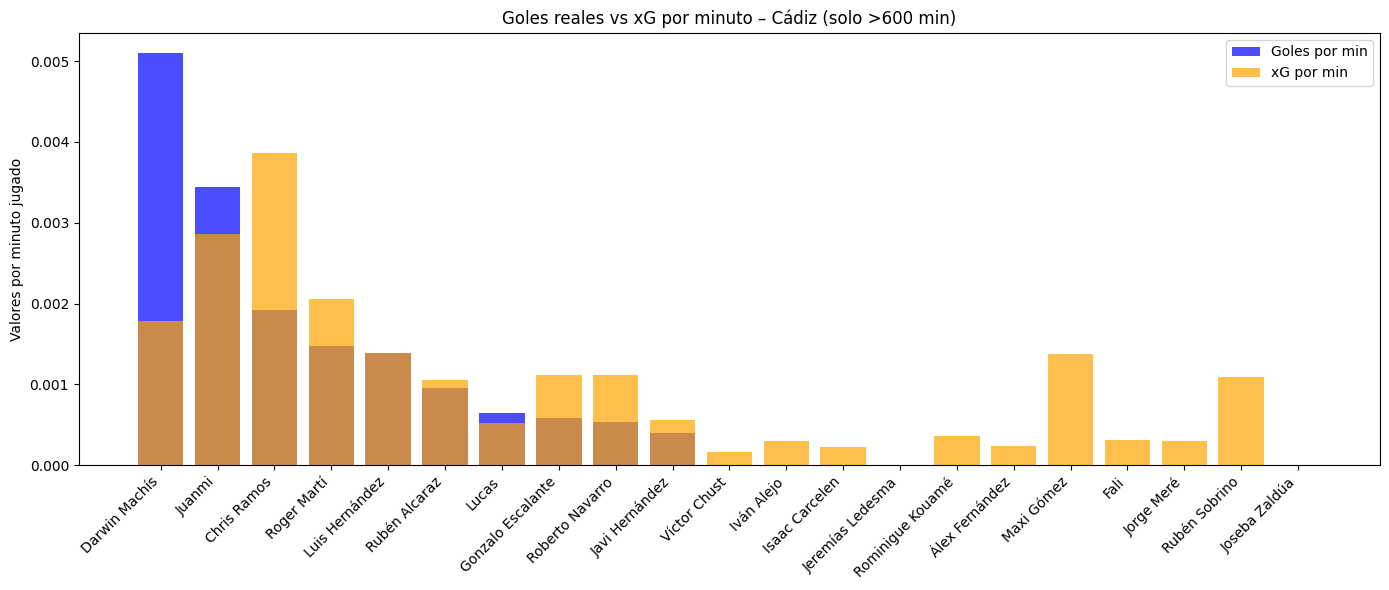

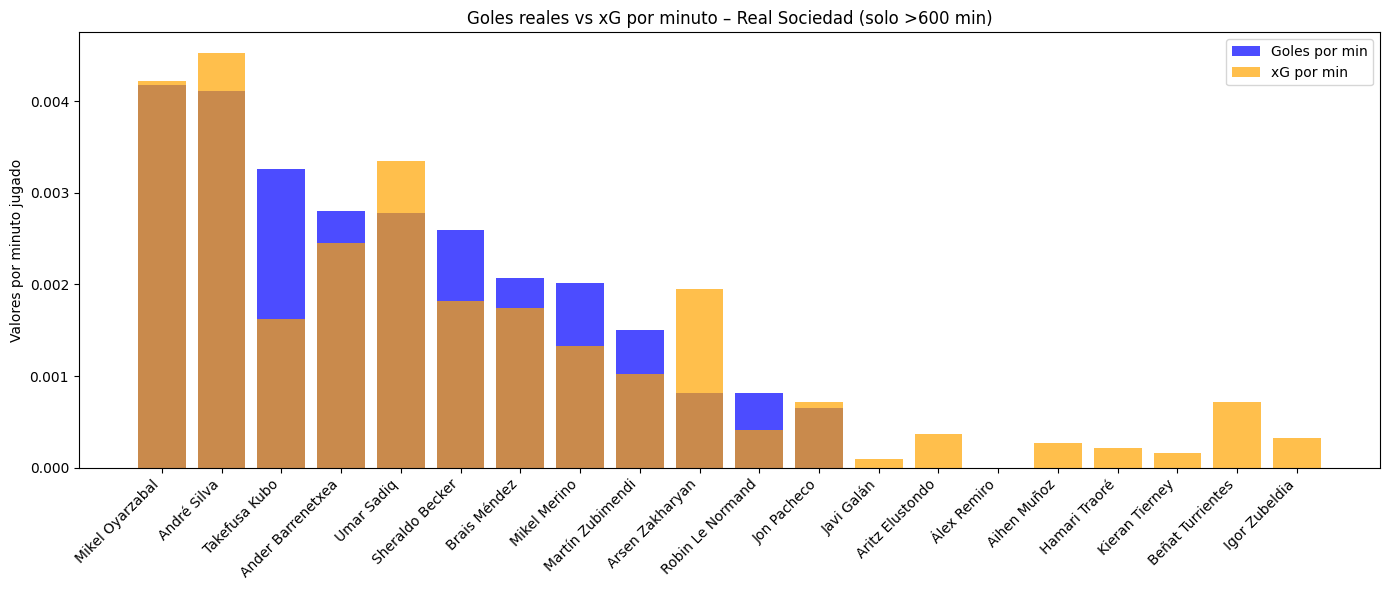

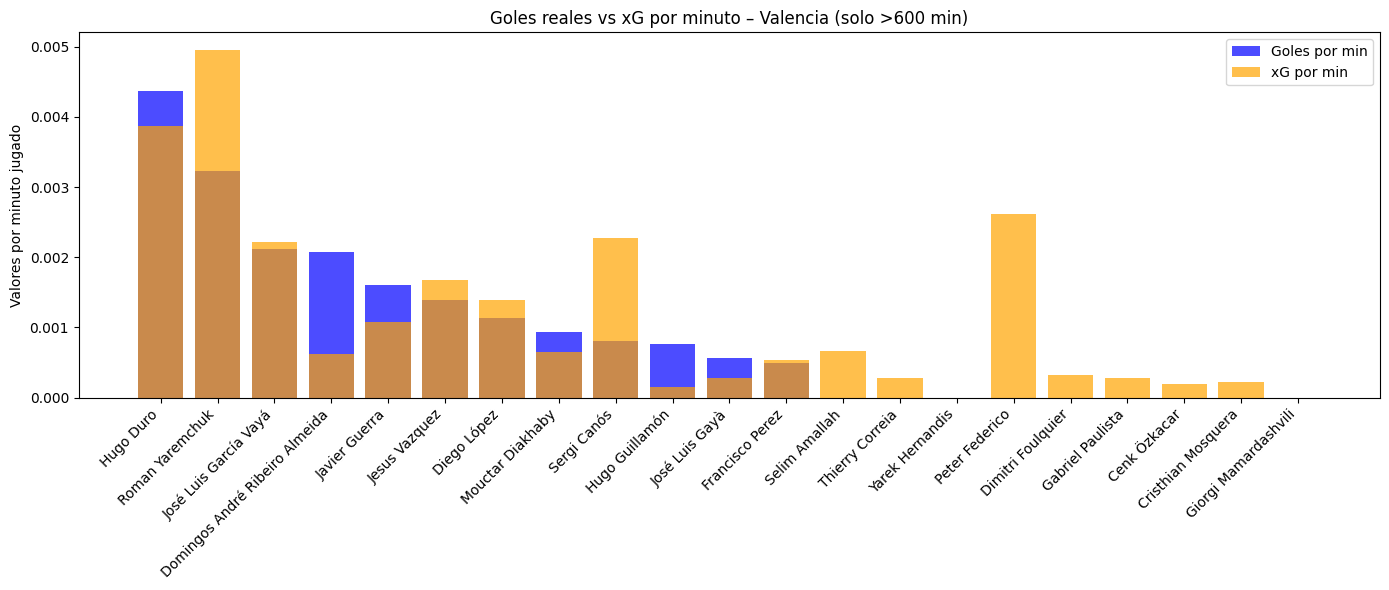

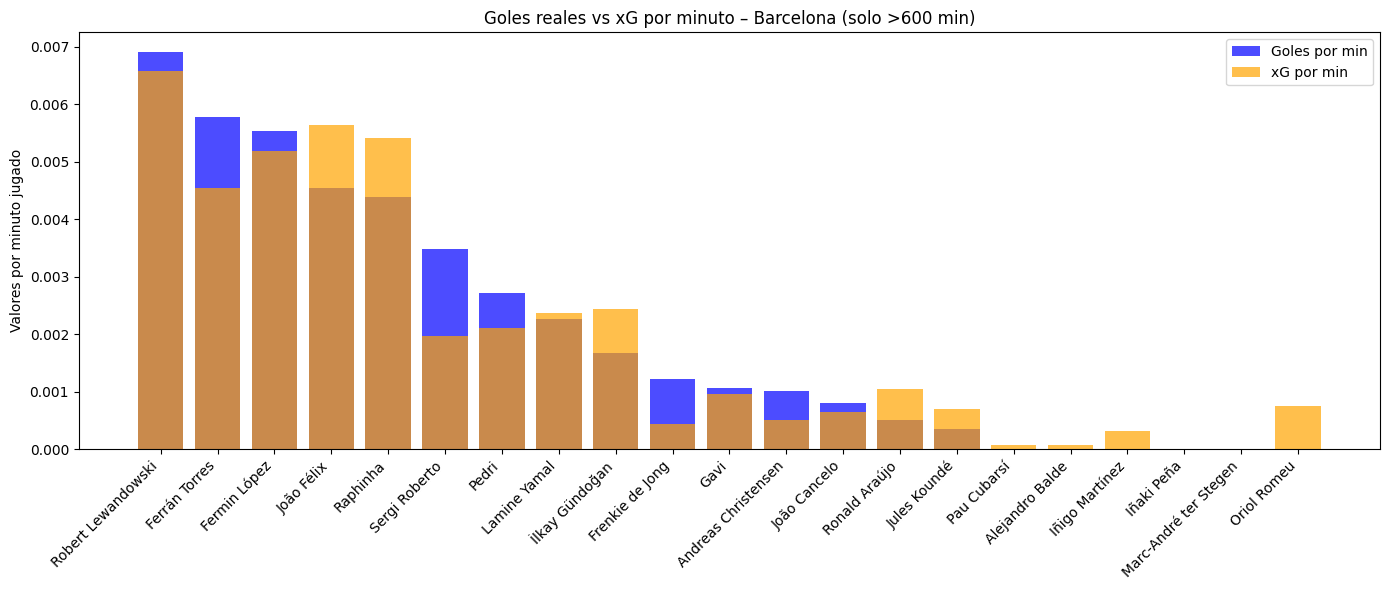

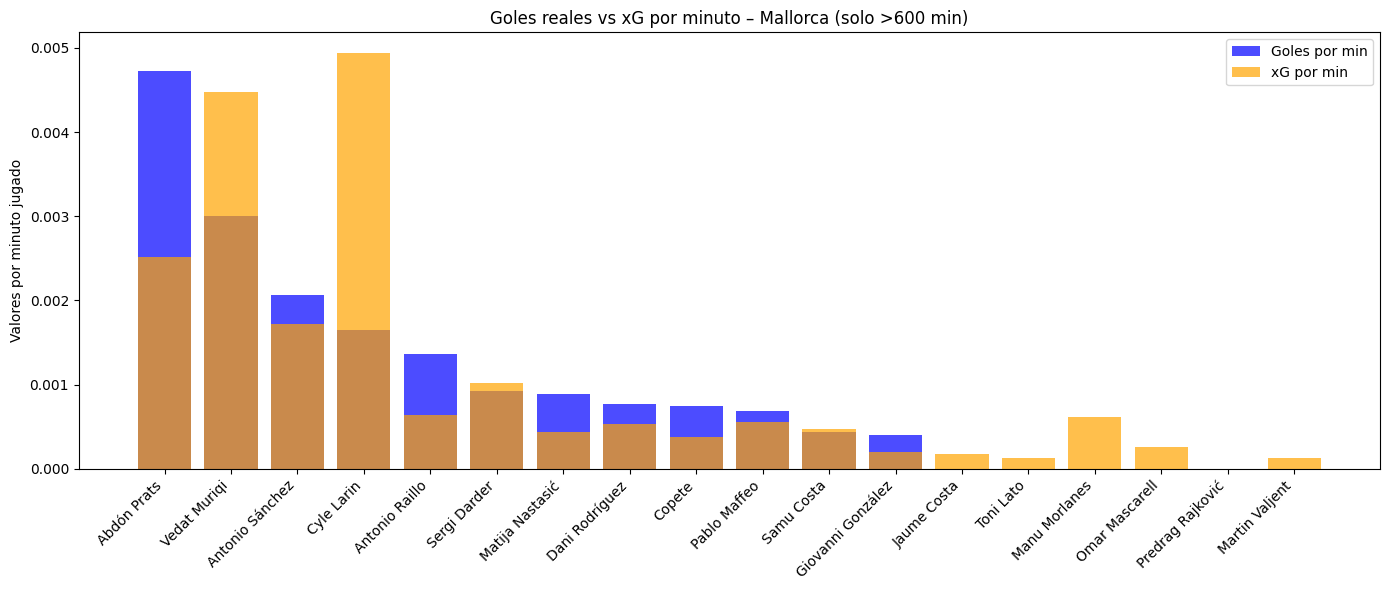

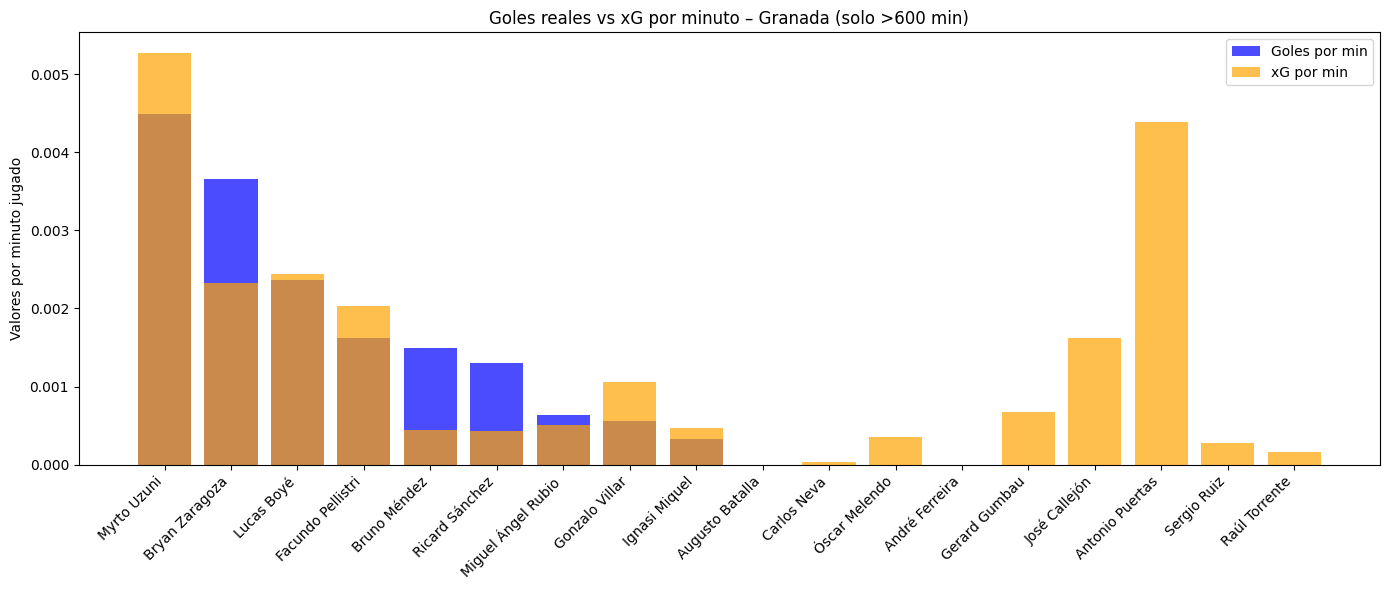

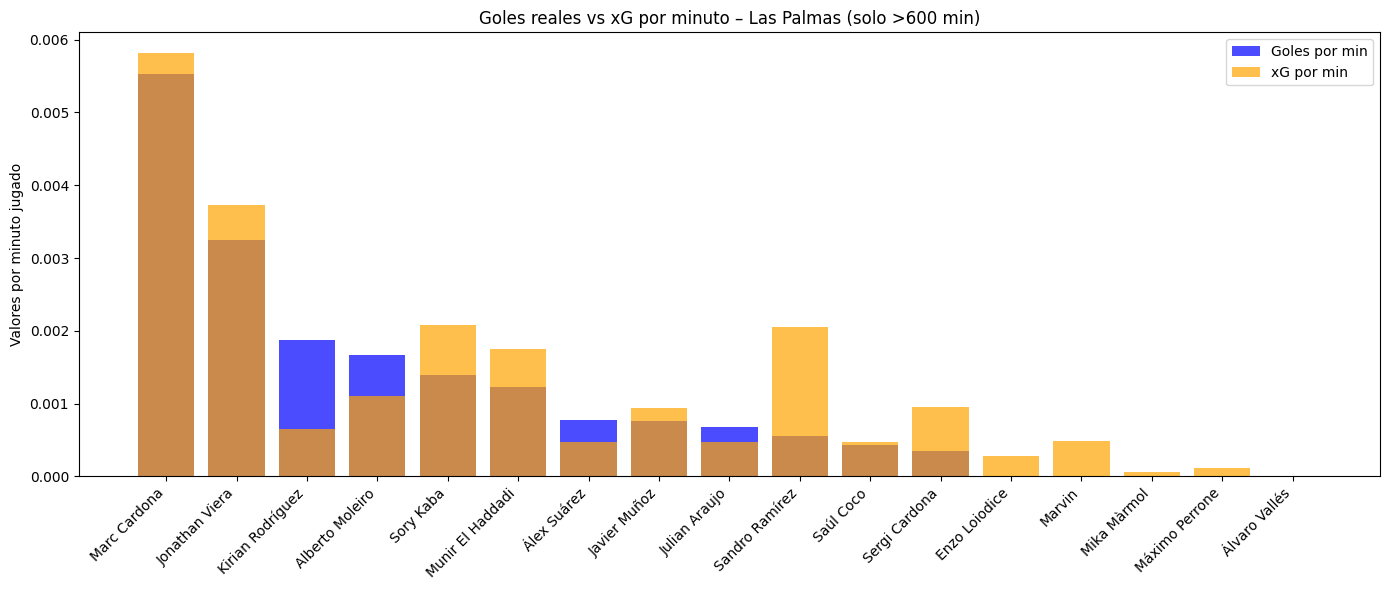

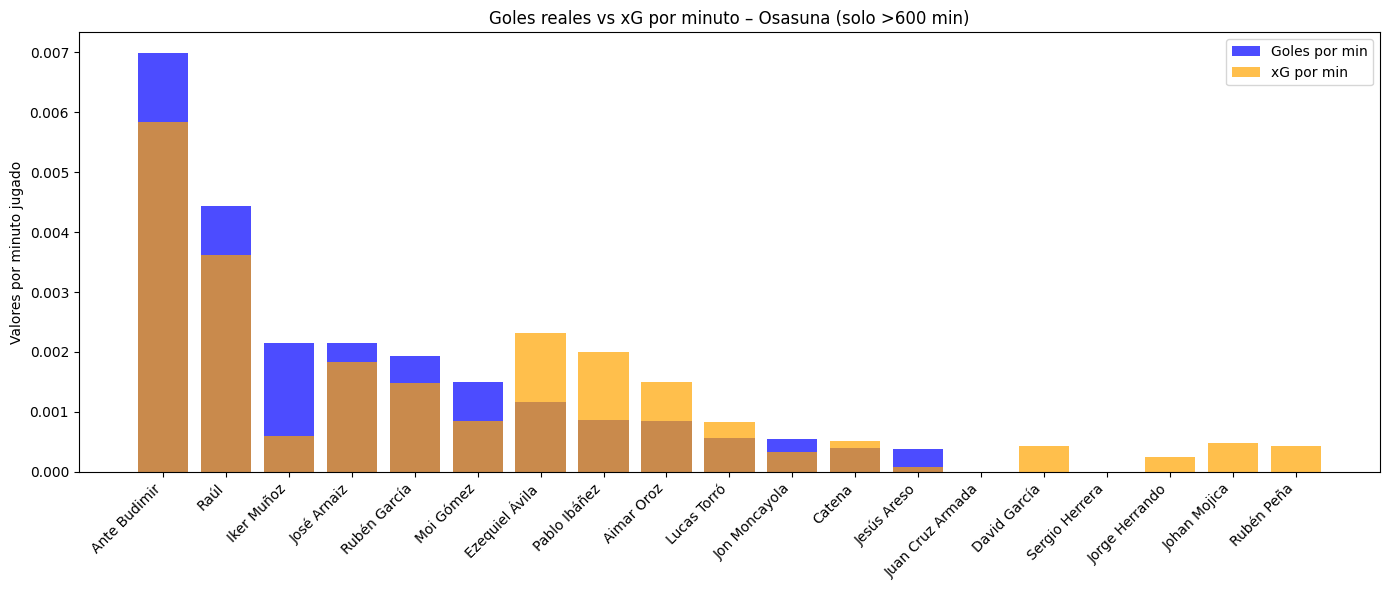

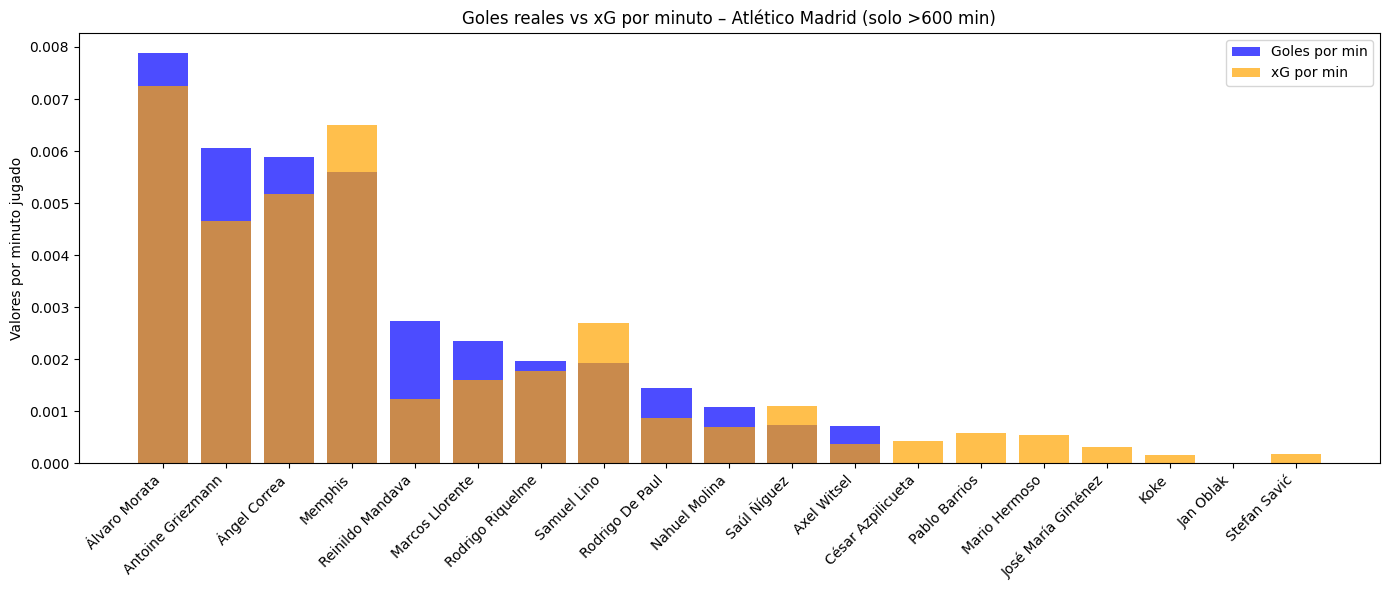

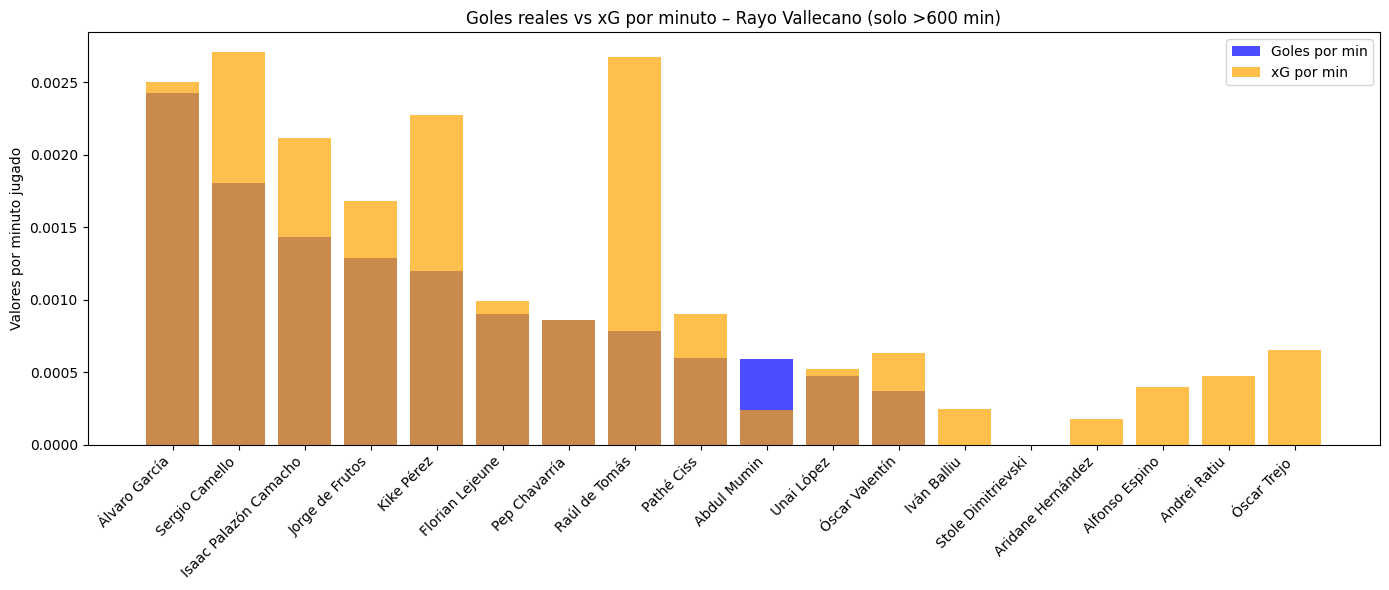

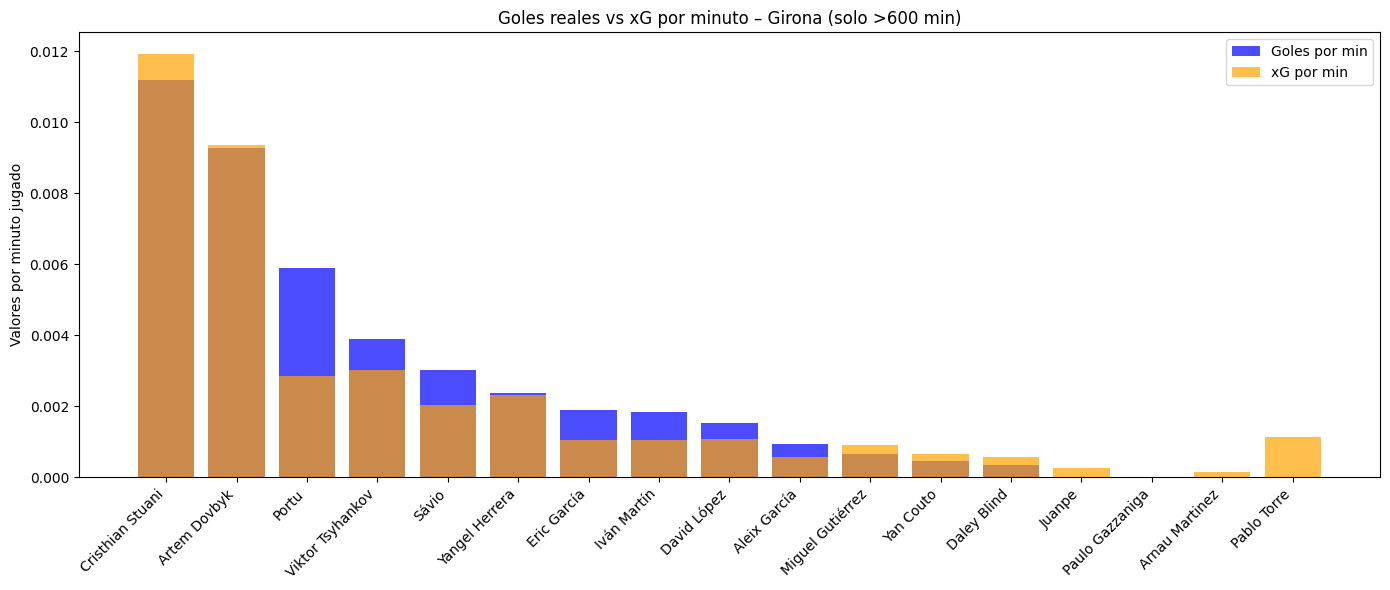

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# ------- CONFIGURACIÓN -------
minutos_minimos = 600  # Cambia este valor a 300, 900, 1500...

# Filtrar solo La Liga
df_espa = df[df['Competition'] == 'es La Liga'].copy()

# Obtener lista de equipos
equipos = df_espa['Squad'].unique()

for e in equipos:

    # Filtrar jugadores del equipo y eliminar los de pocos minutos
    df_rm = df_espa[
        (df_espa['Squad'] == e) &
        (df_espa['Playing Time_Min'] >= minutos_minimos)
    ].copy()

    # Si no hay jugadores suficientes, saltar el equipo
    if df_rm.empty:
        print(f"⚠️ Equipo {e} sin jugadores con más de {minutos_minimos} min. Saltando...")
        continue

    # Calcular métricas
    df_rm['Goles_por_min'] = df_rm['Performance_Gls'] / df_rm['Playing Time_Min']
    df_rm['GolesEsperados_por_min'] = df_rm['Expected_xG'] / df_rm['Playing Time_Min']

    # Ordenar jugadores por eficiencia real
    df_rm = df_rm.sort_values('Goles_por_min', ascending=False)

    # ----- GRÁFICO -----
    plt.figure(figsize=(14, 6))

    # Barras: goles reales por minuto
    plt.bar(df_rm['Player'], df_rm['Goles_por_min'], 
            color='blue', alpha=0.7, label='Goles por min')

    # Barras: xG por minuto
    plt.bar(df_rm['Player'], df_rm['GolesEsperados_por_min'], 
            color='orange', alpha=0.7, label='xG por min')

    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Valores por minuto jugado')
    plt.title(f'Goles reales vs xG por minuto – {e} (solo >{minutos_minimos} min)')
    plt.legend()
    plt.tight_layout()
    plt.show()


### Apreciamos diferencias entre los dos graficos del Real Madrid

Al filtrar los jugadores con muy pocos minutos jugados, eliminamos ruido y obtenemos una imagen más realista y estable de la diferencia entre goles reales y goles esperados, centrada únicamente en jugadores con impacto significativo en la competición.

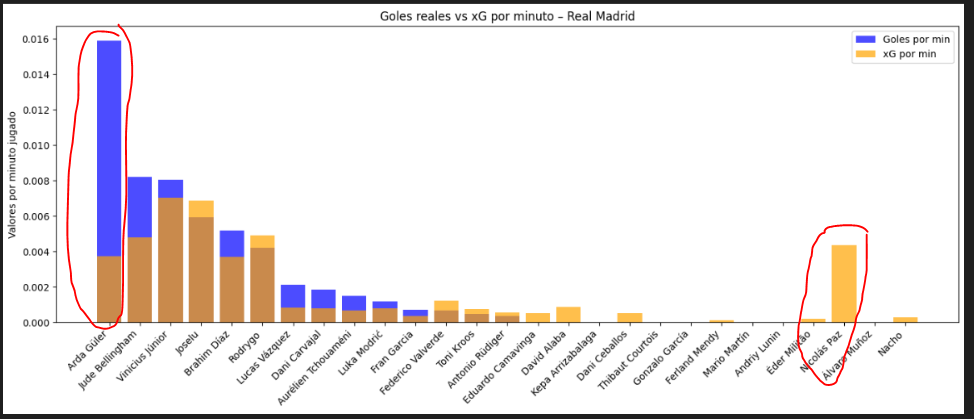

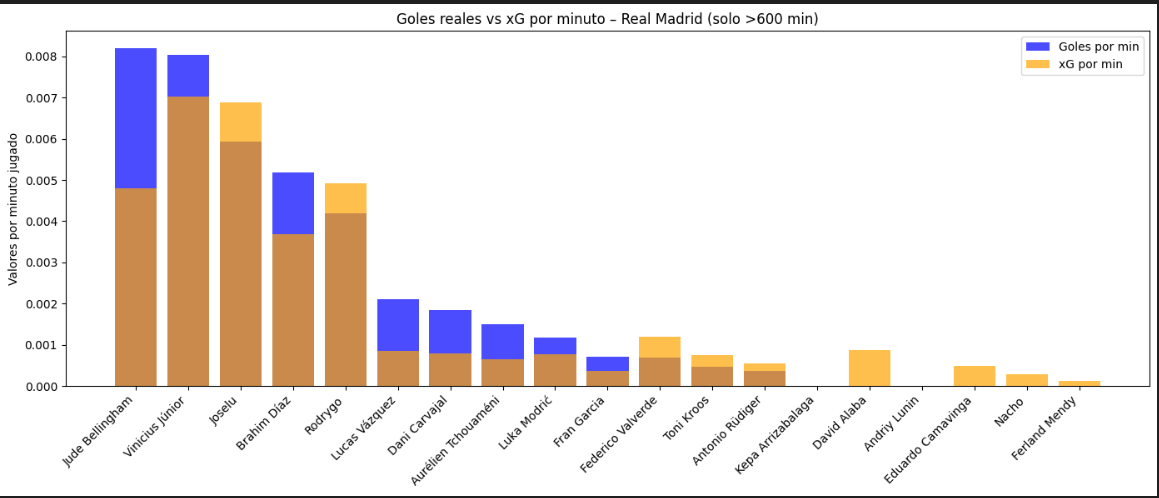

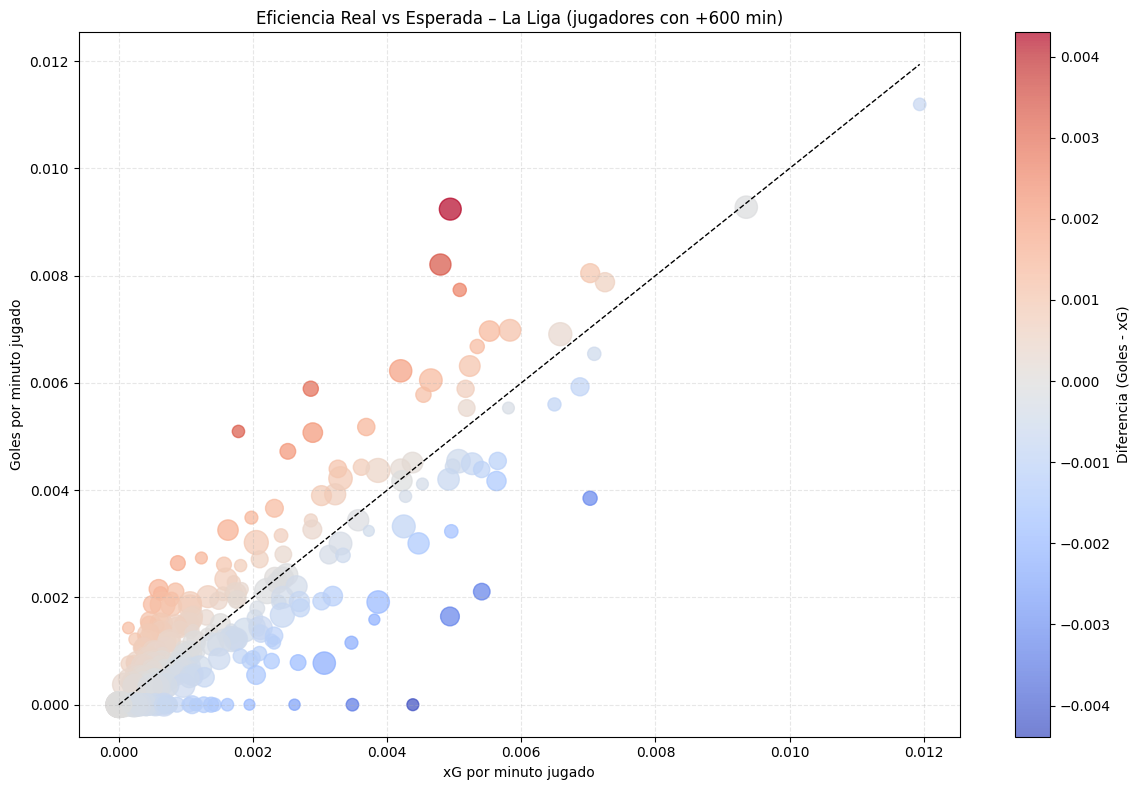

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------- CONFIGURACIÓN --------
minutos_minimos = 600   # cámbialo según lo estricto que quieras

# -------- PREPARACIÓN DE DATOS --------
# Filtrar solo La Liga
df_espa = df[df['Competition'] == 'es La Liga'].copy()

# Crear columnas globales
df_espa['Goles_por_min'] = df_espa['Performance_Gls'] / df_espa['Playing Time_Min']
df_espa['xG_por_min'] = df_espa['Expected_xG'] / df_espa['Playing Time_Min']
df_espa['Diferencia'] = df_espa['Goles_por_min'] - df_espa['xG_por_min']

# Filtrar minutos > X
df_espa = df_espa[df_espa['Playing Time_Min'] >= minutos_minimos]

# Tabla Global
tabla_global = df_espa[['Player', 'Squad', 'Playing Time_Min',
                        'Performance_Gls', 'Expected_xG',
                        'Goles_por_min', 'xG_por_min', 'Diferencia', 'Position']].copy()

# Ordenar por eficiencia
tabla_global = tabla_global.sort_values('Goles_por_min', ascending=False)

# -------- GRAFICO SCATTER GLOBAL --------
plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    tabla_global['xG_por_min'],
    tabla_global['Goles_por_min'],
    c=tabla_global['Diferencia'],
    cmap="coolwarm",
    s=tabla_global['Playing Time_Min'] / 10,  # tamaño proporcional
    alpha=0.7,
)

# Línea diagonal x = y
max_val = max(tabla_global["xG_por_min"].max(), tabla_global["Goles_por_min"].max())
plt.plot([0, max_val], [0, max_val], 'k--', linewidth=1)

plt.colorbar(scatter, label="Diferencia (Goles - xG)")
plt.xlabel("xG por minuto jugado")
plt.ylabel("Goles por minuto jugado")
plt.title(f"Eficiencia Real vs Esperada – La Liga (jugadores con +{minutos_minimos} min)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


### COMPARATIVA DE GRAFICOS  DE 'Eficiencia Real vs Esperada – La Liga' sin minutos minimos VS con minutos minimos 


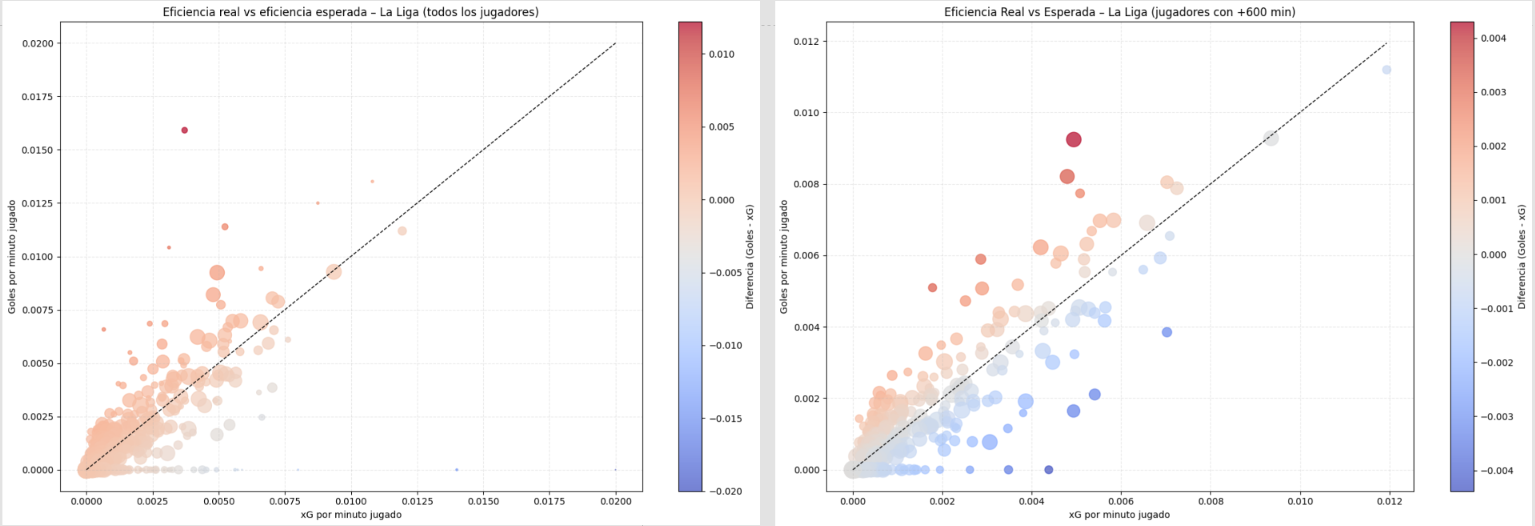

### Conclusion

Con jugadores +600 minutos, la eficiencia real y la esperada de La Liga es mucho más coherente.
Se observan patrones muy buenos (rojos encima de la diagonal), jugadores que generan mucho pero fallan (azules grandes), y la mayoría de jugadores rinden cerca de lo esperado.

In [33]:
!pip install plotly.express nbformat ipywidgets ipykernel 

In [34]:
mio = tabla_global [tabla_global['Playing Time_Min']<700]
mio

Player           Squad  Playing Time_Min  Performance_Gls  \
2693    Jonathan Viera      Las Palmas               617                2   
2429  Giuliano Simeone          Alavés               630                1   
2345    Jesús Santiago          Getafe               656                1   
475   William Carvalho           Betis               680                1   
1775   Stefan Mitrović          Getafe               699                1   
93       Selim Amallah        Valencia               604                0   
1118     Luiz Henrique           Betis               616                0   
1803      Ilaix Moriba          Getafe               605                0   
1731        Jorge Meré           Cádiz               673                0   
853     Peter Federico        Valencia               649                0   
2192      Andrei Ratiu  Rayo Vallecano               630                0   
376      Claudio Bravo           Betis               630                0   

      Expected_xG  Goles_por_min  xG_por_min  Diferencia Position  
2693          2.3       0.003241    0.003728   -0.000486    MF,FW  
2429          2.4       0.001587     0.00381   -0.002222       FW  
2345          0.6       0.001524    0.000915     0.00061       MF  
475           0.4       0.001471    0.000588    0.000882       MF  
1775          0.1       0.001431    0.000143    0.001288       DF  
93            0.4            0.0    0.000662   -0.000662    FW,MF  
1118          1.2            0.0    0.001948   -0.001948       FW  
1803          0.3            0.0    0.000496   -0.000496    MF,FW  
1731          0.2            0.0    0.000297   -0.000297       DF  
853           1.7            0.0    0.002619   -0.002619    MF,FW  
2192          0.3            0.0    0.000476   -0.000476    DF,MF  
376           0.0            0.0         0.0         0.0       GK

### Aqui hacemos un grafico de dispersión como el anterior, pero interactivo

In [35]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "vscode"   # 🔥 FORZAMOS A ABRIR EN EL NAVEGADOR

fig = px.scatter(
    tabla_global,
    x="xG_por_min",
    y="Goles_por_min",
    color="Diferencia",
    size="Playing Time_Min",
    hover_name="Player",
    hover_data=["Squad", "Performance_Gls", "Expected_xG", "Position"],
    color_continuous_scale="RdBu_r",
    title=f"Eficiencia Real vs Esperada – La Liga (jugadores con +{minutos_minimos} min)"
)
# -----------------------------------
# 🔥 1. MISMA ESCALA ENTRE X E Y
# -----------------------------------
fig.update_yaxes(scaleanchor="x", scaleratio=1)

# -----------------------------------
# 🔥 2. DEFINIR RANGO MANUAL
# (igual que Matplotlib -> ambos ejes con el mismo rango)
# -----------------------------------
min_val = 0
max_val = max(tabla_global["xG_por_min"].max(), tabla_global["Goles_por_min"].max())

fig.update_xaxes(range=[min_val, max_val])
fig.update_yaxes(range=[min_val, max_val])

# Opcional: definir ticks cada 0.002
fig.update_xaxes(dtick=0.002)
fig.update_yaxes(dtick=0.002)

# -----------------------------------
# 🔥 3. FIGURA CUADRADA
# -----------------------------------
fig.update_layout(width=900, height=900)

fig.show()


### Nos disponemos a hacer tres graficos de dispersion, cada uno en funcion a la posicion de los jugadores

In [36]:
tabla_global_DF = tabla_global[tabla_global['Position']=='DF']
tabla_global_FW = tabla_global[tabla_global['Position']=='FW']
tabla_global_MF = tabla_global[tabla_global['Position']=='MF']

### DEFENSAS

In [37]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "vscode"   # 🔥 FORZAMOS A ABRIR EN EL NAVEGADOR

fig = px.scatter(
    tabla_global_DF,
    x="xG_por_min",
    y="Goles_por_min",
    color="Diferencia",
    size="Playing Time_Min",
    hover_name="Player",
    hover_data=["Squad", "Performance_Gls", "Expected_xG", "Position"],
    color_continuous_scale="RdBu_r",
    title=f"Eficiencia Real vs Esperada (DEFENSAS) – La Liga (jugadores con +{minutos_minimos} min)"
)

# -----------------------------------
# 🔥 1. MISMA ESCALA ENTRE X E Y
# -----------------------------------
fig.update_yaxes(scaleanchor="x", scaleratio=1)

# -----------------------------------
# 🔥 2. DEFINIR RANGO MANUAL
# (igual que Matplotlib -> ambos ejes con el mismo rango)
# -----------------------------------
min_val = 0
max_val = max(tabla_global["xG_por_min"].max(), tabla_global["Goles_por_min"].max())

fig.update_xaxes(range=[min_val, max_val])
fig.update_yaxes(range=[min_val, max_val])

# Opcional: definir ticks cada 0.002
fig.update_xaxes(dtick=0.002)
fig.update_yaxes(dtick=0.002)

# -----------------------------------
# 🔥 3. FIGURA CUADRADA
# -----------------------------------
fig.update_layout(width=900, height=900)

fig.show()

### MEDIOCENTROS

In [38]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "vscode"   # 🔥 FORZAMOS A ABRIR EN EL NAVEGADOR

fig = px.scatter(
    tabla_global_MF,
    x="xG_por_min",
    y="Goles_por_min",
    color="Diferencia",
    size="Playing Time_Min",
    hover_name="Player",
    hover_data=["Squad", "Performance_Gls", "Expected_xG", "Position"],
    color_continuous_scale="RdBu_r",
    title=f"Eficiencia Real vs Esperada (MEDIOCENTROS) – La Liga (jugadores con +{minutos_minimos} min)"
)
# -----------------------------------
# 🔥 1. MISMA ESCALA ENTRE X E Y
# -----------------------------------
fig.update_yaxes(scaleanchor="x", scaleratio=1)

# -----------------------------------
# 🔥 2. DEFINIR RANGO MANUAL
# (igual que Matplotlib -> ambos ejes con el mismo rango)
# -----------------------------------
min_val = 0
max_val = max(tabla_global["xG_por_min"].max(), tabla_global["Goles_por_min"].max())

fig.update_xaxes(range=[min_val, max_val])
fig.update_yaxes(range=[min_val, max_val])

# Opcional: definir ticks cada 0.002
fig.update_xaxes(dtick=0.002)
fig.update_yaxes(dtick=0.002)

# -----------------------------------
# 🔥 3. FIGURA CUADRADA
# -----------------------------------
fig.update_layout(width=900, height=900)

fig.show()

### DELANTEROS

In [39]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "vscode"   # 🔥 FORZAMOS A ABRIR EN EL NAVEGADOR

fig = px.scatter(
    tabla_global_FW,
    x="xG_por_min",
    y="Goles_por_min",
    color="Diferencia",
    size="Playing Time_Min",
    hover_name="Player",
    hover_data=["Squad", "Performance_Gls", "Expected_xG", "Position"],
    color_continuous_scale="RdBu_r",
    title=f"Eficiencia Real vs Esperada (DELANTEROS) – La Liga (jugadores con +{minutos_minimos} min)"
)

# -----------------------------------
# 🔥 1. MISMA ESCALA ENTRE X E Y
# -----------------------------------
fig.update_yaxes(scaleanchor="x", scaleratio=1)

# -----------------------------------
# 🔥 2. DEFINIR RANGO MANUAL
# (igual que Matplotlib -> ambos ejes con el mismo rango)
# -----------------------------------
min_val = 0
max_val = max(tabla_global["xG_por_min"].max(), tabla_global["Goles_por_min"].max())

fig.update_xaxes(range=[min_val, max_val])
fig.update_yaxes(range=[min_val, max_val])

# Opcional: definir ticks cada 0.002
fig.update_xaxes(dtick=0.002)
fig.update_yaxes(dtick=0.002)

# -----------------------------------
# 🔥 3. FIGURA CUADRADA
# -----------------------------------
fig.update_layout(width=900, height=900)

fig.show()

### Conclusion

Si nos fijamos, vemos que el grafico que tiene la distribucion mas densa es el de los MEDIOCENTROS, esto da a entender que el rendimineto de los mediocentros ha sido bastante homogeneo entre todos los jugadores de esa posicion, aunque el color determina finalemente si su rendimiento ha sido mas o menos eficiente en base a su prevision de goles.

# Recepciones progresivas

In [40]:
df_espa_min = df[(df_espa['Playing Time_Min']>600)&(df['Position']=='FW')&(df['Competition']=='es La Liga')].copy()
df_espa_min['progesiones por partido'] = (df_espa_min['Progression_PrgC'])/(df_espa_min['Playing Time_90s'])
df_espa_min

/tmp/ipykernel_27470/2930573990.py:1: FutureWarning:

Operation between Series with different indexes that are not of numpy boolean or object dtype will no longer return a numpy boolean result in a future version. Cast both Series to object type to maintain the prior behavior.



Rank                Player  Nation Position            Squad  \
149    150            Iago Aspas  es ESP       FW       Celta Vigo   
210    211         Léo Baptistão  br BRA       FW          Almería   
285    286        Álex Berenguer  es ESP       FW    Athletic Club   
293    294          Isaac Bernal  es ESP       FW          Sevilla   
365    366            Lucas Boyé  ar ARG       FW          Granada   
400    401          Ante Budimir  hr CRO       FW          Osasuna   
441    442        Sergio Camello  es ESP       FW   Rayo Vallecano   
462    463          Marc Cardona  es ESP       FW       Las Palmas   
699    700           Assane Diao  es ESP       FW            Betis   
765    766   Anastasios Douvikas  gr GRE       FW       Celta Vigo   
766    767          Artem Dovbyk  ua UKR       FW           Girona   
785    786             Hugo Duro  es ESP       FW         Valencia   
818    819     Youssef En-Nesyri  ma MAR       FW          Sevilla   
836    837       Abde Ezzalzouli  ma MAR       FW            Betis   
857    858            João Félix  pt POR       FW        Barcelona   
994    996            Maxi Gómez  uy URU       FW            Cádiz   
1072  1074        Gorka Guruzeta  es ESP       FW    Athletic Club   
1084  1086      Munir El Haddadi  ma MAR       FW       Las Palmas   
1118  1120         Luiz Henrique  br BRA       FW            Betis   
1222  1224    Luis Javier Suárez  co COL       FW          Almería   
1249  1251          Willian José  br BRA       FW            Betis   
1250  1252                Joselu  es ESP       FW      Real Madrid   
1255  1257                Juanmi  es ESP       FW            Cádiz   
1263  1265       Vinicius Júnior  br BRA       FW      Real Madrid   
1271  1273             Sory Kaba  gn GUI       FW       Las Palmas   
1428  1431            Cyle Larin  ca CAN       FW         Mallorca   
1432  1435         Juanmi Latasa  es ESP       FW           Getafe   
1470  1473    Robert Lewandowski  pl POL       FW        Barcelona   
1523  1526        Anthony Lozano  hn HON       FW          Almería   
1628  1631           Roger Martí  es ESP       FW            Cádiz   
1677  1681         Borja Mayoral  es ESP       FW           Getafe   
1716  1720               Memphis  nl NED       FW  Atlético Madrid   
1796  1801         Álvaro Morata  es ESP       FW  Atlético Madrid   
1800  1805         Gerard Moreno  es ESP       FW       Villarreal   
1839  1844          Vedat Muriqi  xk KVX       FW         Mallorca   
1968  1973      Samuel Omorodion  es ESP       FW           Alavés   
2086  2093           Ayoze Pérez  es ESP       FW            Betis   
2177  2184        Sandro Ramírez  es ESP       FW       Las Palmas   
2193  2200                  Raúl  es ESP       FW          Osasuna   
2255  2262               Rodrygo  br BRA       FW      Real Madrid   
2300  2307            Umar Sadiq  ng NGA       FW    Real Sociedad   
2420  2428           André Silva  pt POR       FW    Real Sociedad   
2429  2437      Giuliano Simeone  ar ARG       FW           Alavés   
2508  2516  Jørgen Strand Larsen  no NOR       FW       Celta Vigo   
2511  2519      Cristhian Stuani  uy URU       FW           Girona   
2534  2543     Alexander Sørloth  no NOR       FW       Villarreal   
2595  2604         Raúl de Tomás  es ESP       FW   Rayo Vallecano   
2604  2613         Ferrán Torres  es ESP       FW        Barcelona   
2653  2662           Myrto Uzuni  al ALB       FW          Granada   
2688  2697        Carlos Vicente  es ESP       FW           Alavés   
2758  2767        Iñaki Williams  gh GHA       FW    Athletic Club   
2760  2769         Nico Williams  es ESP       FW    Athletic Club   
2783  2792          Lamine Yamal  es ESP       FW        Barcelona   
2784  2793       Roman Yaremchuk  ua UKR       FW         Valencia   

     Competition  Age  Year_Born  Playing Time_MP  Playing Time_Starts  ...  \
149   es La Liga   35       1987               35                   31  ... 

In [41]:
df_espa_min[['progesiones por partido',"Per 90 Minutes_npxG+xAG"]]

progesiones por partido  Per 90 Minutes_npxG+xAG
149                  2.790698                     0.59
210                   1.27451                     0.34
285                  3.446328                     0.46
293                  2.695652                     0.78
365                  1.276596                     0.32
400                  0.774908                     0.48
441                  1.189189                     0.31
462                      1.25                     0.55
699                  2.844828                     0.28
765                  0.990099                     0.59
766                  0.627178                     0.84
785                   0.81571                     0.39
818                  0.594406                     0.40
836                    5.9375                     0.26
857                  4.035088                     0.69
994                  1.007752                     0.17
1072                 0.731707                     0.54
1084                 0.955882                     0.20
1118                 5.147059                     0.42
1222                 2.941176                     0.62
1249                 0.365297                     0.37
1250                 0.802139                     0.62
1255                 0.721649                     0.43
1263                 6.618357                     0.80
1271                    0.875                     0.23
1428                 0.985222                     0.52
1432                 0.404624                     0.29
1470                 1.405229                     0.65
1523                 1.395349                     0.46
1628                 0.463576                     0.37
1677                 1.129707                     0.42
1716                 1.616162                     0.76
1796                 1.037736                     0.69
1800                  1.95122                     0.51
1839                 0.772201                     0.41
1968                 1.408451                     0.56
2086                 3.529412                     0.44
2177                 3.034826                     0.28
2193                 1.059603                     0.37
2255                 6.022727                     0.56
2300                      1.5                     0.39
2420                 0.617284                     0.35
2429                 3.571429                     0.52
2508                 1.037736                     0.54
2511                 0.337079                     1.29
2534                 1.732852                     0.60
2595                 0.780142                     0.28
2604                 2.222222                     0.61
2653                 0.772059                     0.43
2688                 1.854839                     0.49
2758                 3.607595                     0.50
2760                 5.697211                     0.46
2783                 5.020408                     0.47
2784                 1.165049                     0.46

In [43]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "vscode"   # 🔥 FORZAMOS A ABRIR EN EL NAVEGADOR

fig = px.scatter(
    df_espa_min,
    x="Per 90 Minutes_npxG+xAG",
    y="progesiones por partido",
    color="Position",
    size="Playing Time_Min",
    hover_name="Player",
    hover_data=["Squad", "Performance_Gls", "Expected_xG", "Position"],
    color_continuous_scale="RdBu_r",
    title=f"Eficiencia Real vs Esperada (MEDIOCENTROS) – La Liga (jugadores con +{minutos_minimos} min)"
)
# -----------------------------------
# 🔥 1. MISMA ESCALA ENTRE X E Y
# -----------------------------------
fig.update_yaxes(scaleanchor="x", scaleratio=1)

# -----------------------------------
# 🔥 2. DEFINIR RANGO MANUAL
# (igual que Matplotlib -> ambos ejes con el mismo rango)
# -----------------------------------
min_val = min(df_espa_min["Per 90 Minutes_npxG+xAG"].min(),
              df_espa_min["progesiones por partido"].min())

max_val = max(df_espa_min["Per 90 Minutes_npxG+xAG"].max(),
              df_espa_min["progesiones por partido"].max())

fig.update_xaxes(range=[min_val, max_val])
fig.update_yaxes(range=[min_val, max_val])


# -----------------------------------
# 🔥 3. FIGURA CUADRADA
# -----------------------------------
fig.update_layout(width=900, height=900)

fig.show()

In [44]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "vscode"

fig = px.scatter(
    df_espa_min,
    x="Per 90 Minutes_npxG+xAG",
    y="progesiones por partido",   # <-- asegúrate de que este nombre existe
    size="Playing Time_Min",
    hover_name="Player",
    hover_data=["Squad", "Performance_Gls", "Expected_xG", "Position"],
    title=f"Eficiencia Real vs Esperada (MEDIOCENTROS) – La Liga (jugadores con +{minutos_minimos} min)"
)

# 🔥 1. MISMA ESCALA ENTRE X E Y
fig.update_yaxes(scaleanchor="x", scaleratio=1)

# 🔥 2. DEFINIR RANGOS REALES SEGÚN ESTE DF
min_val = min(df_espa_min["Per 90 Minutes_npxG+xAG"].min(),
              df_espa_min["progesiones por partido"].min())

max_val = max(df_espa_min["Per 90 Minutes_npxG+xAG"].max(),
              df_espa_min["progesiones por partido"].max())

fig.update_xaxes(range=[min_val, max_val])
fig.update_yaxes(range=[min_val, max_val])

# Opcional: ticks iguales
fig.update_xaxes(dtick=(max_val-min_val)/10)
fig.update_yaxes(dtick=(max_val-min_val)/10)

# 🔥 3. FIGURA CUADRADA
fig.update_layout(width=900, height=900)

fig.show()
